<a id="回到最上層"></a>


# 上半部分為老師的code，作業部分請點擊下方連結<br><br>

[作業](#作業)

# 欄位說明

年齡 (Age)<br>
工作階級類型 (Workclass)<br>
? (Fnlwgt - Final Weighting)<br>
教育程度 (Education)<br>
教育年數 (Education Num)<br>
婚姻狀態 (Marital Status)<br>
職業 (Occupation)<br>
家庭關係 (Relationship)<br>
種族 (Race)<br>
性別 (Sex)<br>
資本增益 (Capital Gain)<br>
資本損失 (Capital Loss)<br>
每周工作時數 (Hours per Week)<br>
籍貫國家 (Native Country)<br>
收入 (Income)<br>

In [243]:
import pandas as pd
data = pd.read_csv('adult.data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [244]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation', 'relationship', 'race', 'sex',
              'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [245]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. 年齡和收入的關係是甚麼？

In [246]:
age = data['age']
income = data['income']

In [247]:
age_income = pd.concat([age, income], axis=1)
age_income.columns = ['age', 'income']  # 可以這樣設定列名

In [248]:
# 我想要在 income 中找出有幾種收入的類別

age_income['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

<Axes: xlabel='income', ylabel='age'>

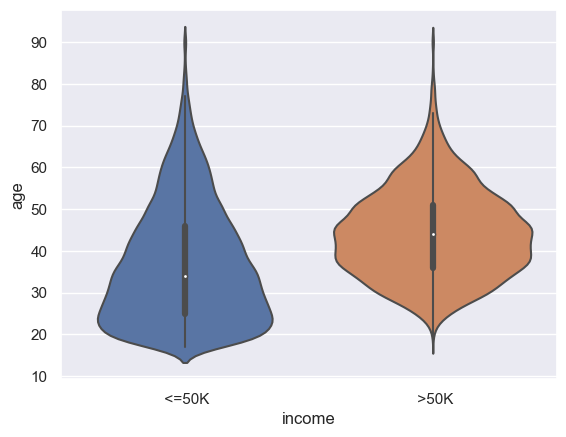

In [249]:
import seaborn as sns
sns.violinplot(data=age_income, x="income", y="age")

## How many men and women (sex feature) are represented in this dataset?

In [250]:
sex_counts = data['sex'].value_counts()
sex_counts

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [252]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

<a id="2"></a>

# 2. 哪些工作類型更容易賺到高薪？哪些工作類型更容易賺到低薪？


In [253]:
workclass = data['workclass']
workclass.head()

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [254]:
workclass_income = pd.concat([workclass, income], axis=1)
workclass_income.columns = ['workclass', 'income']  # 可以這樣設定列名

In [255]:
workclass_income.head()

,workclass,income
0,State-gov,<=50K
1,Self-emp-not-inc,<=50K
2,Private,<=50K
3,Private,<=50K
4,Private,<=50K


In [256]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [257]:
income_distribution_counts = data.groupby('workclass')['income'].value_counts().unstack()
income_distribution_counts

income,<=50K,>50K
workclass,,
?,1645.0,191.0
Federal-gov,589.0,371.0
Local-gov,1476.0,617.0
Never-worked,7.0,NaN
Private,17733.0,4963.0
Self-emp-inc,494.0,622.0
Self-emp-not-inc,1817.0,724.0
State-gov,945.0,353.0
Without-pay,14.0,NaN


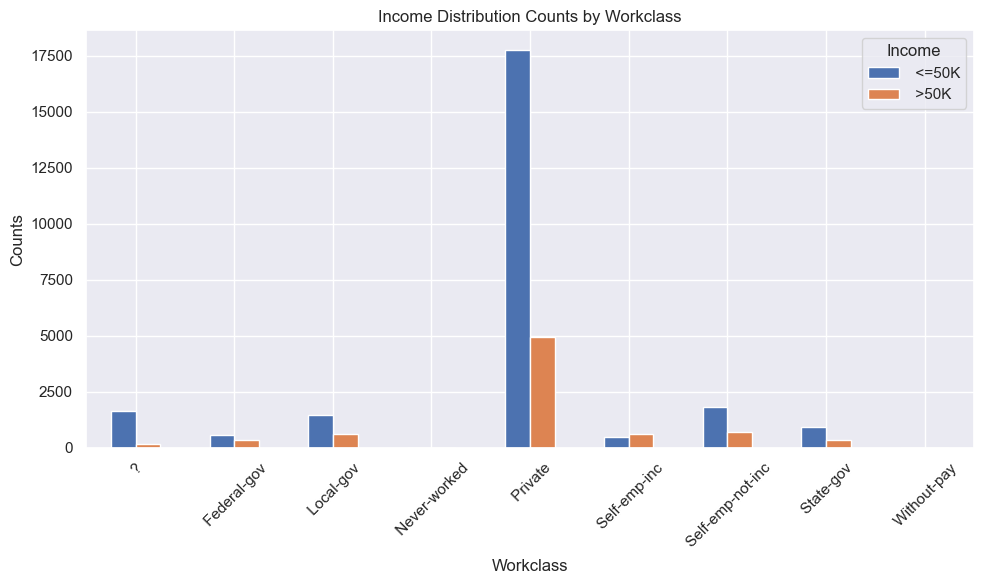

In [258]:
import matplotlib.pyplot as plt

# 繪製柱狀圖
income_distribution_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Income Distribution Counts by Workclass')  # 設定圖表標題
plt.xlabel('Workclass')  # 設定X軸標籤
plt.ylabel('Counts')  # 設定Y軸標籤
plt.xticks(rotation=45)  # 旋轉X軸標籤，以便更好地展示
plt.legend(title='Income')  # 設定圖例標題
plt.tight_layout()  # 自動調整子圖參數, 使之填充整個圖像區域
plt.show()

# 3.工作時間是否影響收入？

<Axes: xlabel='income', ylabel='hours_per_week'>

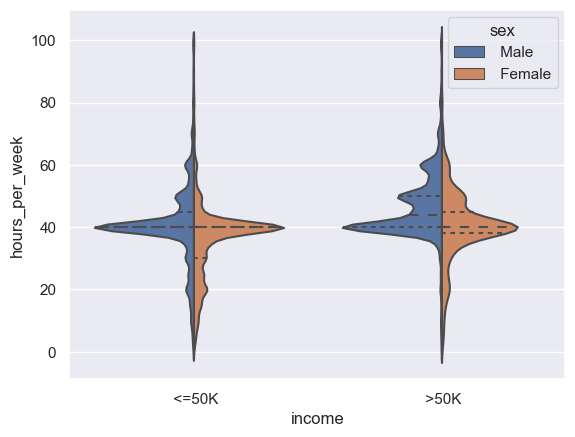

In [259]:
sns.violinplot(data=data, x="income", y="hours_per_week", hue="sex", split=True, inner="quart")

### 去除空白

In [260]:
# 記錄被修剪的列
trimmed_columns = []

# 對 DataFrame 中的每一列應用 str.strip() 方法
for col in data.columns:
    if data[col].dtype == 'object':  # 僅處理對象類型的列（字符串列）
        data[col] = data[col].str.strip()
        trimmed_columns.append(col)

# # 打印處理後的 DataFrame 和被修剪的列
# print("Trimmed DataFrame:")
# print(data)
# print("\nTrimmed columns:")
# print(trimmed_columns)

[回到最上層](#回到最上層)
<a id="作業"></a>
<a id="回到作業"></a>



# 作業




## 主題: 工資收入和種族的關係為何?

<br><br>
問題1: [各國勞動力人口數量分布?](#各國勞動力人口數量分布?)<br><br>
問題2: [在各自國家中，種族收入最高的族群為何?](#在各自國家中，種族收入最高的族群為何?)   
<br>(觀察)[不同國家之間，國內每個種族的收入水準](#不同國家之間，國內每個種族的收入水準)<br><br>
問題3: [哪個種族最容易出現貧富差距?](#哪個種族最容易出現貧富差距?)<br><br>

[結論](#結論)

In [261]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<a id="各國勞動力人口數量分布?"></a>
<br><br><br><br>
<br><br>
問題2: [在各自國家中，種族收入最高的族群為何?](#在各自國家中，種族收入最高的族群為何?)   
<br>(觀察)[不同國家之間，國內每個種族的收入水準](#不同國家之間，國內每個種族的收入水準)<br><br>
問題3: [哪個種族最容易出現貧富差距?](#哪個種族最容易出現貧富差距?)<br><br>
## 問題1: 各國勞動力人口數量分布? 


<br><br>
[回到作業](#回到作業)

In [262]:
# 首先，根據 'native_country' 列計算每個國家的工作人口
workforce_count = data.groupby('native_country')['race'].count()

# 然後，使用 'map' 方法將這些計數回填到原始數據集的新列 'country_workforce' 中
data['country_workforce'] = data['native_country'].map(workforce_count)

# 檢視 'native_country' 和 'country_workforce' 列的唯一值組合
unique_combinations = data[['native_country', 'country_workforce']].drop_duplicates()
unique_combinations = unique_combinations.sort_values(by='country_workforce', ascending=False)
print(unique_combinations)

                   native_country  country_workforce
0                   United-States              29170
15                         Mexico                643
14                              ?                583
152                   Philippines                198
122                       Germany                137
112                        Canada                121
35                    Puerto-Rico                114
497                   El-Salvador                106
11                          India                100
4                            Cuba                 95
98                        England                 90
6                         Jamaica                 81
27                          South                 80
873                         China                 75
201                         Italy                 73
427            Dominican-Republic                 70
2259                      Vietnam                 67
771                     Guatemala             

In [263]:
US_workforce_proportion = (
    unique_combinations[unique_combinations['native_country']=='United-States']['country_workforce']/
    unique_combinations['country_workforce'].sum()
)
print(US_workforce_proportion)

0    0.895857
Name: country_workforce, dtype: float64


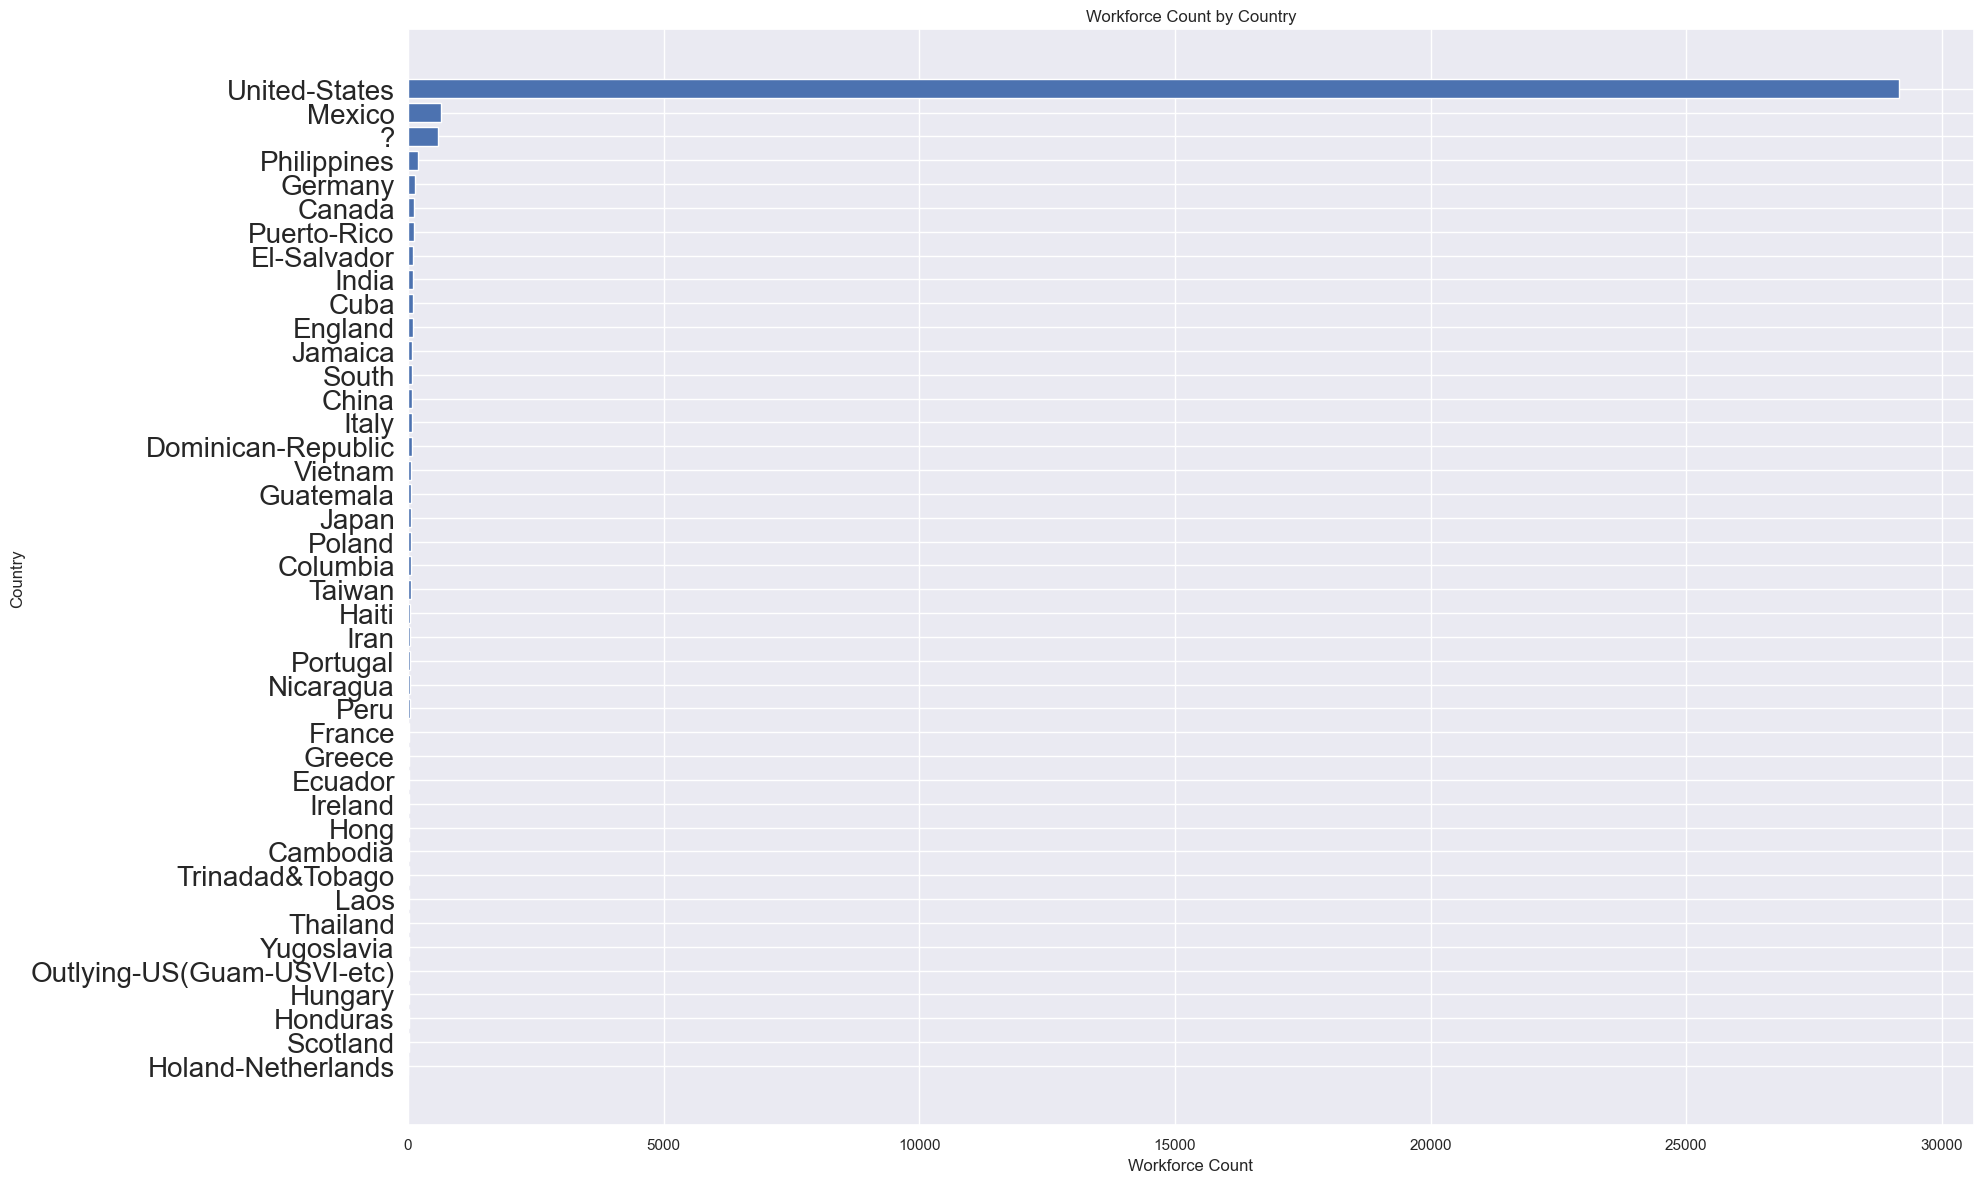

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設置 Seaborn 風格
sns.set()

# 绘制横向柱状图，并按大小顺序排序
unique_combinations = unique_combinations.sort_values(by='country_workforce', ascending=True)
plt.figure(figsize=(20, 12))
plt.barh(unique_combinations['native_country'], unique_combinations['country_workforce'])
plt.xlabel('Workforce Count')
plt.ylabel('Country')
plt.title('Workforce Count by Country')
plt.yticks(fontsize=20)
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域并避免“挤压”
plt.show()


發現 1 : 美國人占了此資料將進九成的比例 >> imbalance data

<a id="不同國家之間，國內每個種族的收入水準"></a>
<br><br><br><br>

<br><br>
問題1: [各國勞動力人口數量分布?](#各國勞動力人口數量分布?)<br><br>
問題2: [在各自國家中，種族收入最高的族群為何?](#在各自國家中，種族收入最高的族群為何?) <br>  
問題3: [哪個種族最容易出現貧富差距?](#哪個種族最容易出現貧富差距?)<br><br>
    
## (觀察)不同國家之間，國內每個種族的收入水準

作法: 將收入以百分比的方式呈現 (例: 在墨西哥國內，亞洲人"收入>50K"的，占亞洲人自己多少比例? "收入<=50K"占多少比例?)

<br><br><br><br>
[回到作業](#回到作業)


In [270]:
# 在同一個國家中，工資收入和種族的關係為何?
def race_income_proportion_distribution_by_country(data, native_country):
    
    # 先依照國家分類
    df = data[data['native_country'] == native_country]
    
    # 根據種族對收入進行分組，並計算每個組合的數量
    df = df.groupby('race')['income'].value_counts().unstack()
    df.fillna(0, inplace=True)
    
    # 確保 '>50K' 和 '<=50K' 列存在
    if '>50K' not in df.columns:
        df['>50K'] = 0  # 如果列不存在，则创建并初始化为 0
    if '<=50K' not in df.columns:
        df['<=50K'] = 0  # 如果列不存在，则创建并初始化为 0

    for index, row in df.iterrows():    
        if row['<=50K'] == False:
            df.at[index, '<=50K'] = 0
        if row['>50K'] == False:
            df.at[index, '>50K'] = 0

    
    
    # 計算收入低於等於50K的百分比
    df['<=50K_%'] = ( df['<=50K'] / (df['<=50K'] + df['>50K']) ) * 100

    # 計算收入高於50K的百分比
    df['>50K_%'] = ( df['>50K'] / (df['<=50K'] + df['>50K']) ) * 100
    df['Gap'] = df['<=50K_%'] - df['>50K_%']

    return df

# 畫出在不同國家中，工資收入和種族的關係柱狀圖?
def plot_race_income_proportion_distribution_by_country(race_income_proportion_distribution_by_country_df, native_country):
    
    df = race_income_proportion_distribution_by_country_df
    
    # 只留下百分比欄位
    df.drop(columns = ['<=50K', '>50K'], inplace=True)

    
    # 繪製柱狀圖
    df.plot(kind='bar', figsize=(10, 6))

    plt.title(f'Income Proportion Distribution by Race in {native_country}')  # 設定圖表標題
    plt.xlabel('Race')  # 設定X軸標籤
    plt.ylabel('Proportion')  # 設定Y軸標籤
    plt.xticks(rotation=45)  # 旋轉X軸標籤，以便更好地展示
    plt.legend(title='Income')  # 設定圖例標題
    plt.tight_layout()  # 自動調整子圖參數, 使之填充整個圖像區域
    plt.show()
    
    print(df)
    


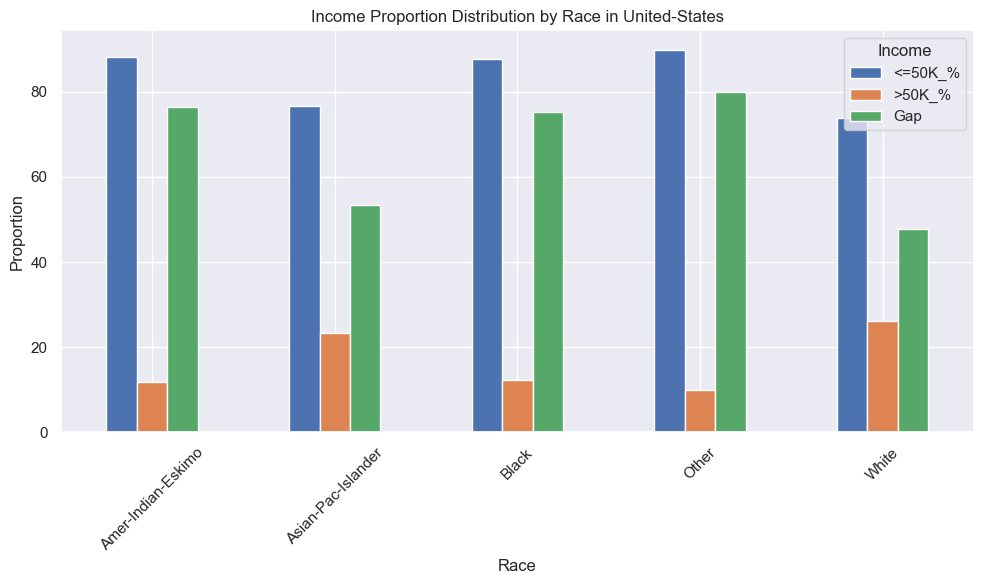

income                <=50K_%     >50K_%        Gap
race                                               
Amer-Indian-Eskimo  88.175676  11.824324  76.351351
Asian-Pac-Islander  76.712329  23.287671  53.424658
Black               87.605932  12.394068  75.211864
Other               89.922481  10.077519  79.844961
White               73.833964  26.166036  47.667929


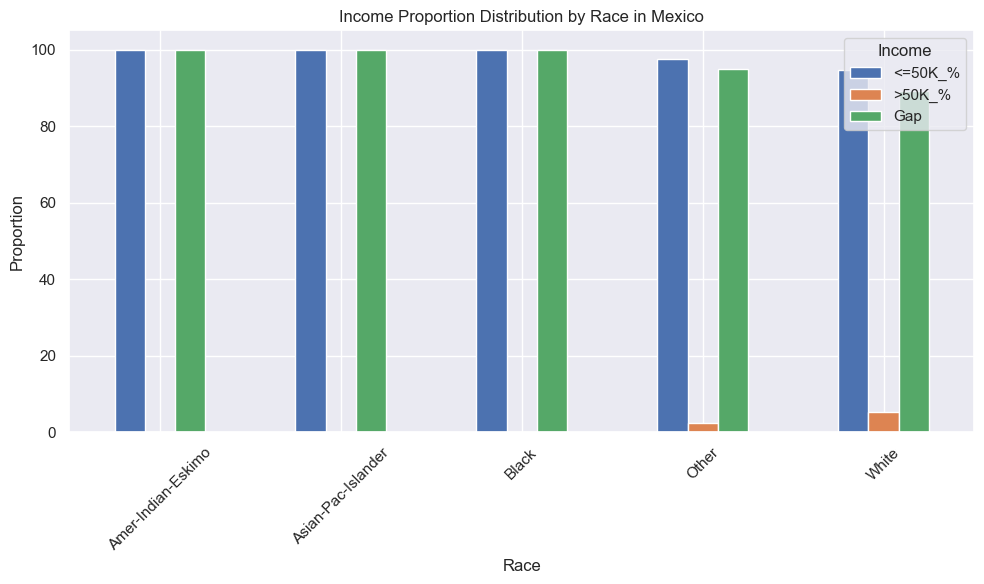

income                 <=50K_%    >50K_%         Gap
race                                                
Amer-Indian-Eskimo  100.000000  0.000000  100.000000
Asian-Pac-Islander  100.000000  0.000000  100.000000
Black               100.000000  0.000000  100.000000
Other                97.500000  2.500000   95.000000
White                94.576271  5.423729   89.152542


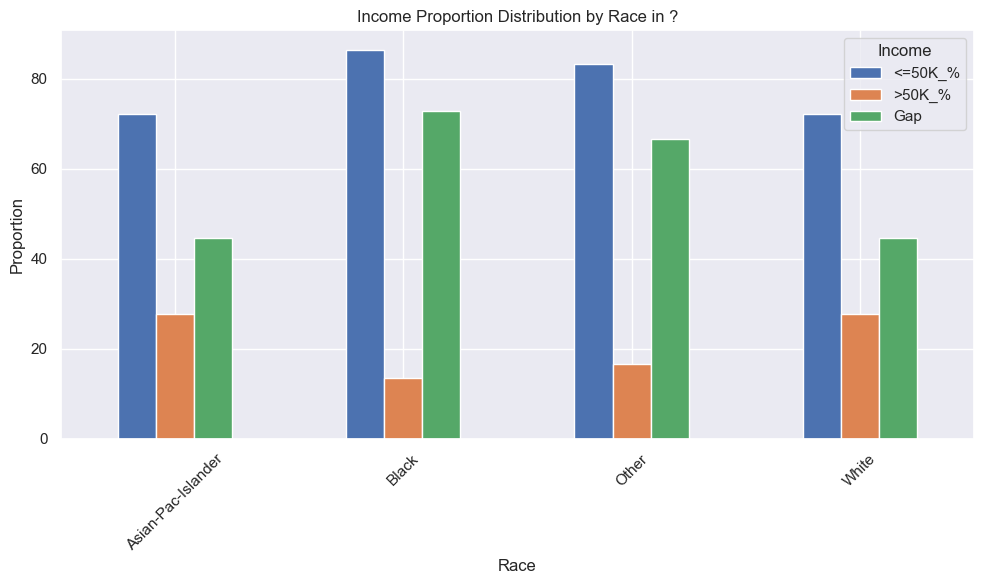

income                <=50K_%     >50K_%        Gap
race                                               
Asian-Pac-Islander  72.289157  27.710843  44.578313
Black               86.458333  13.541667  72.916667
Other               83.333333  16.666667  66.666667
White               72.279793  27.720207  44.559585


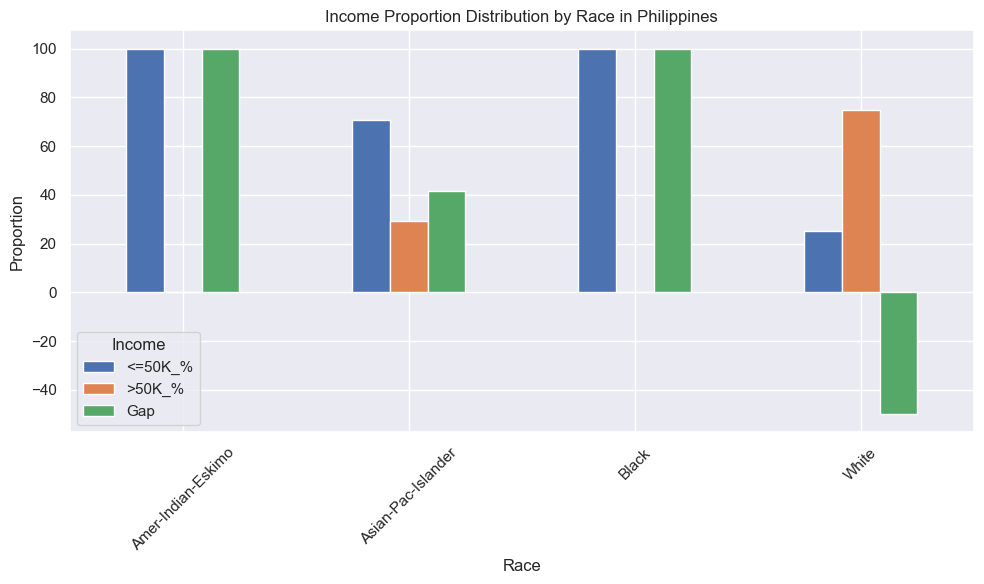

income                 <=50K_%     >50K_%         Gap
race                                                 
Amer-Indian-Eskimo  100.000000   0.000000  100.000000
Asian-Pac-Islander   70.744681  29.255319   41.489362
Black               100.000000   0.000000  100.000000
White                25.000000  75.000000  -50.000000


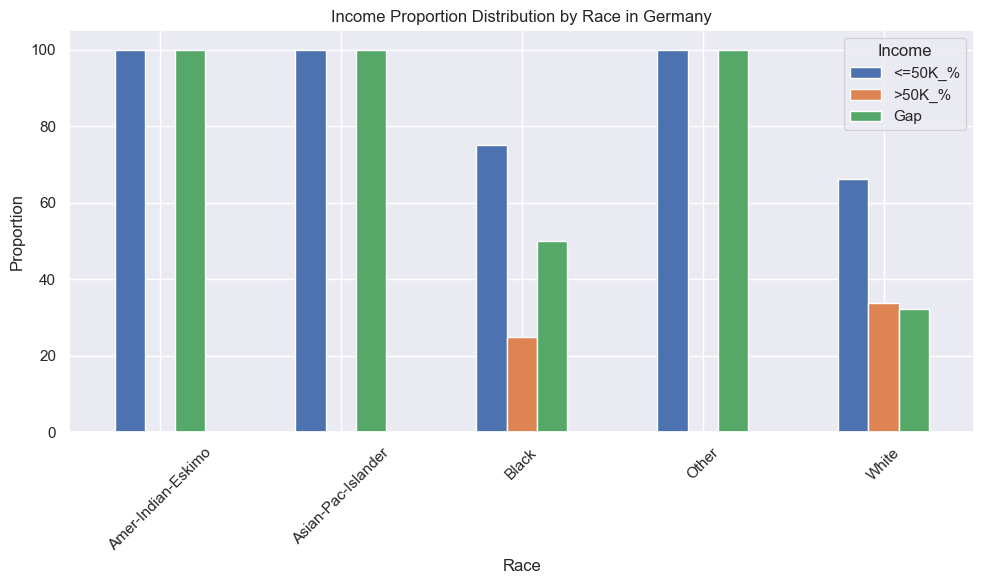

income                 <=50K_%     >50K_%         Gap
race                                                 
Amer-Indian-Eskimo  100.000000   0.000000  100.000000
Asian-Pac-Islander  100.000000   0.000000  100.000000
Black                75.000000  25.000000   50.000000
Other               100.000000   0.000000  100.000000
White                66.129032  33.870968   32.258065


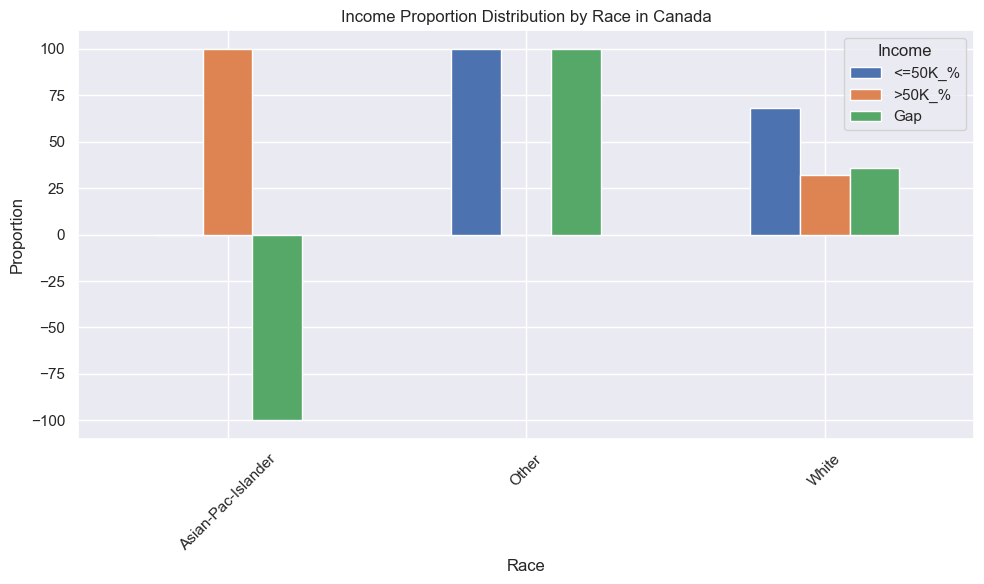

income                 <=50K_%      >50K_%         Gap
race                                                  
Asian-Pac-Islander    0.000000  100.000000 -100.000000
Other               100.000000    0.000000  100.000000
White                68.067227   31.932773   36.134454


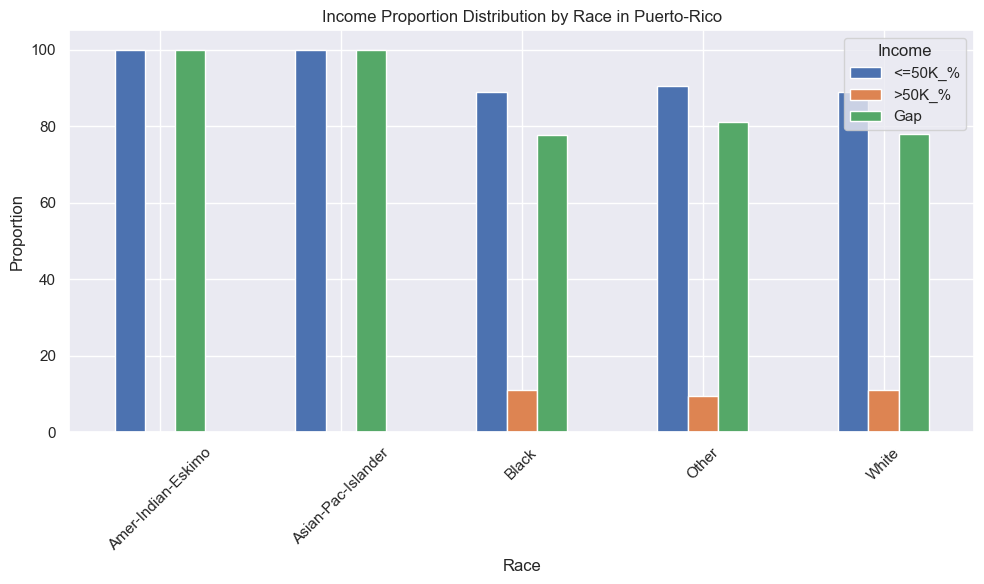

income                 <=50K_%     >50K_%         Gap
race                                                 
Amer-Indian-Eskimo  100.000000   0.000000  100.000000
Asian-Pac-Islander  100.000000   0.000000  100.000000
Black                88.888889  11.111111   77.777778
Other                90.476190   9.523810   80.952381
White                89.024390  10.975610   78.048780


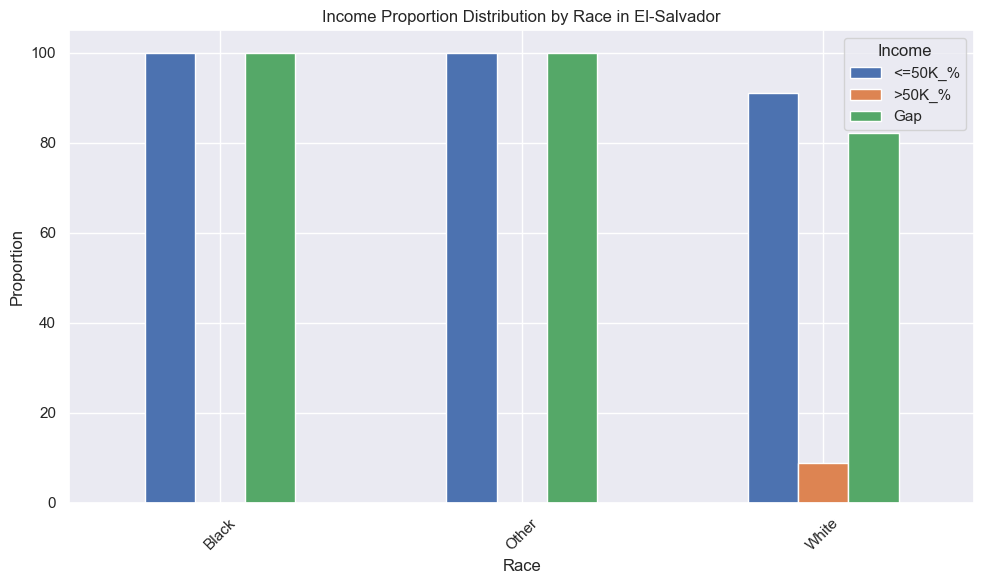

income     <=50K_%    >50K_%         Gap
race                                    
Black   100.000000  0.000000  100.000000
Other   100.000000  0.000000  100.000000
White    91.089109  8.910891   82.178218


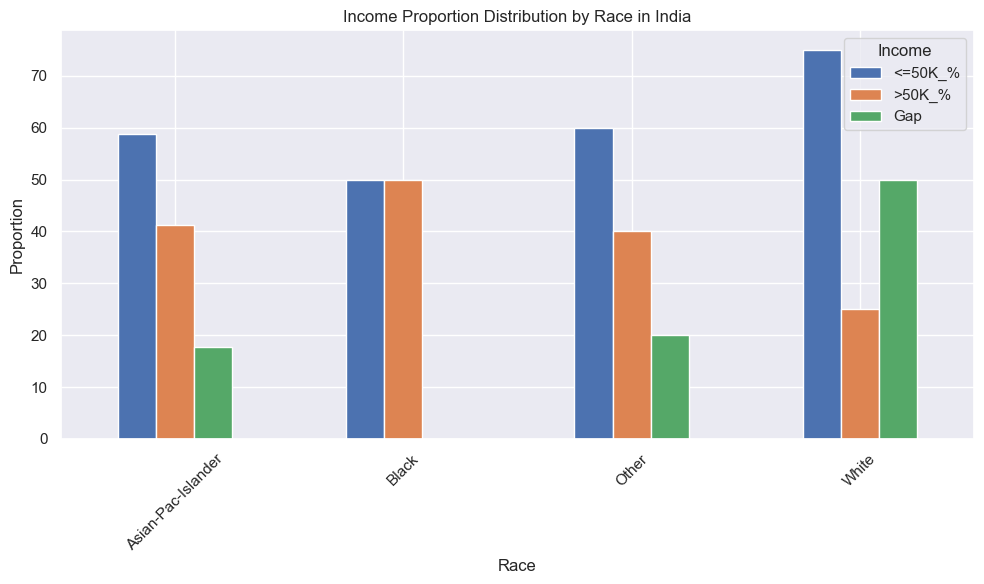

income                <=50K_%     >50K_%        Gap
race                                               
Asian-Pac-Islander  58.823529  41.176471  17.647059
Black               50.000000  50.000000   0.000000
Other               60.000000  40.000000  20.000000
White               75.000000  25.000000  50.000000


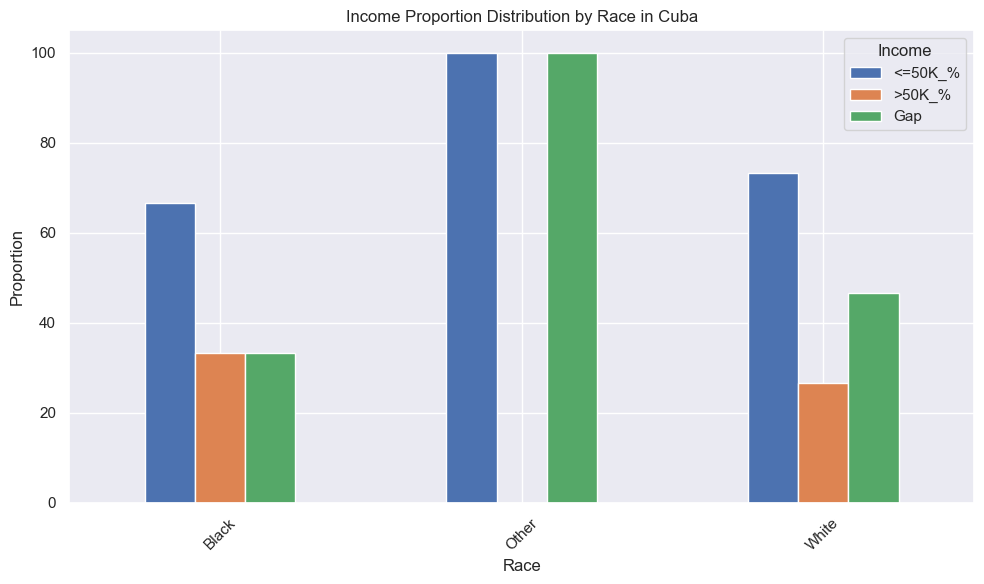

income     <=50K_%     >50K_%         Gap
race                                     
Black    66.666667  33.333333   33.333333
Other   100.000000   0.000000  100.000000
White    73.333333  26.666667   46.666667


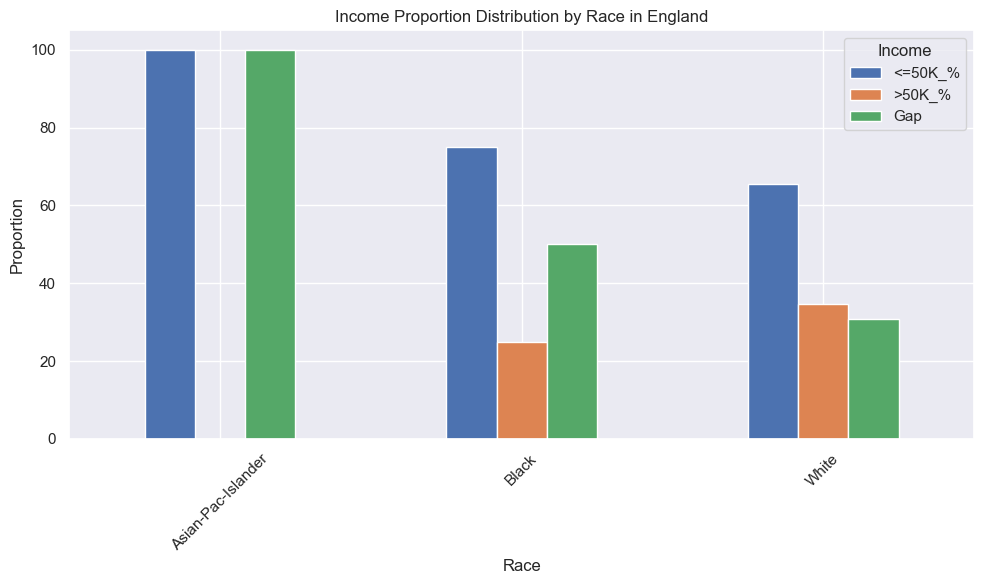

income                 <=50K_%     >50K_%         Gap
race                                                 
Asian-Pac-Islander  100.000000   0.000000  100.000000
Black                75.000000  25.000000   50.000000
White                65.432099  34.567901   30.864198


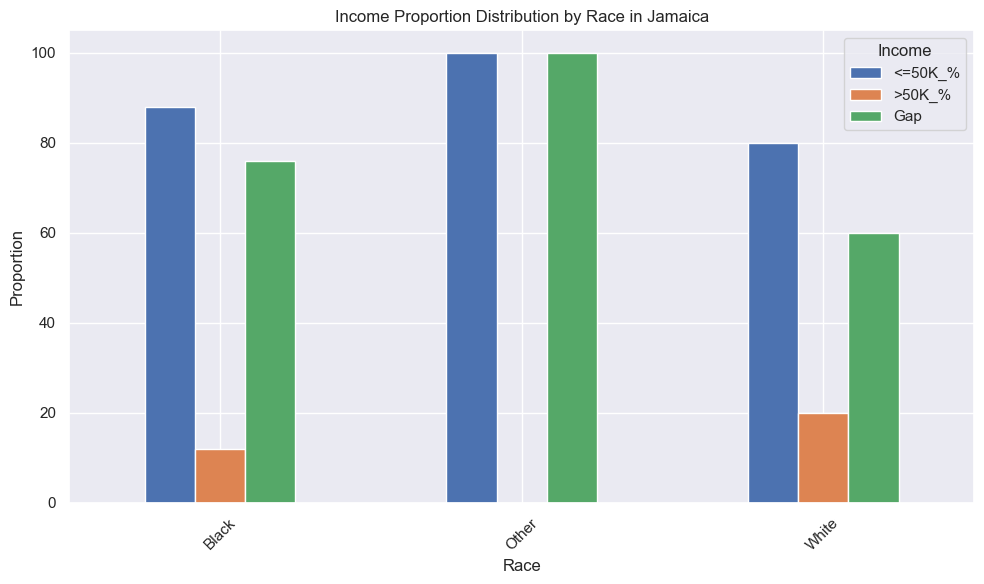

income  <=50K_%  >50K_%    Gap
race                          
Black      88.0    12.0   76.0
Other     100.0     0.0  100.0
White      80.0    20.0   60.0


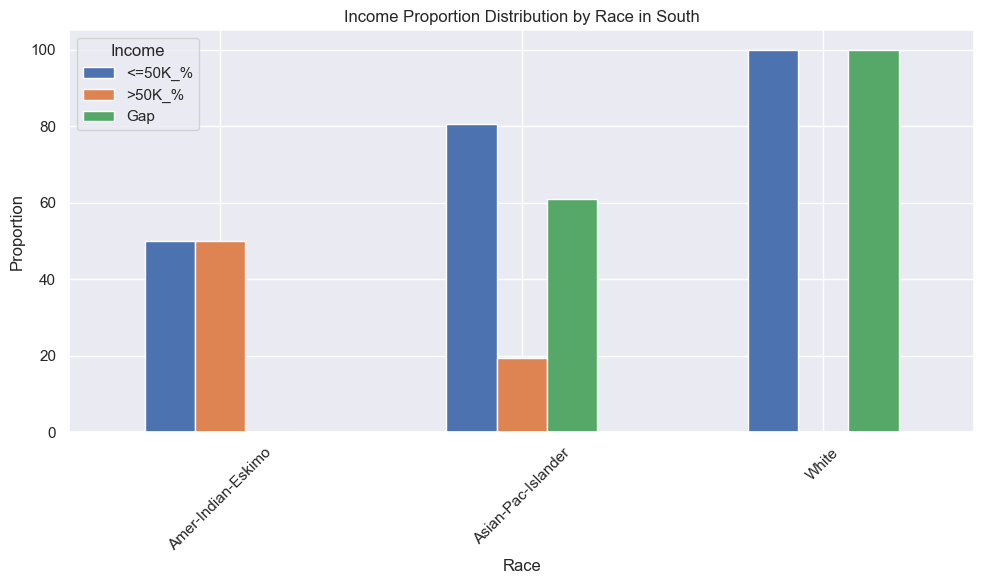

income                 <=50K_%     >50K_%         Gap
race                                                 
Amer-Indian-Eskimo   50.000000  50.000000    0.000000
Asian-Pac-Islander   80.519481  19.480519   61.038961
White               100.000000   0.000000  100.000000


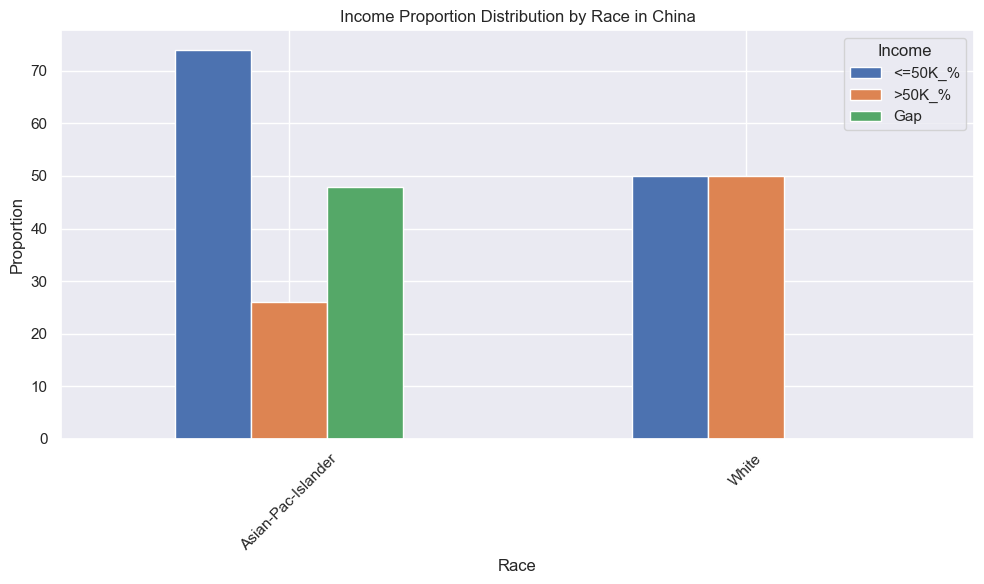

income                <=50K_%     >50K_%        Gap
race                                               
Asian-Pac-Islander  73.972603  26.027397  47.945205
White               50.000000  50.000000   0.000000


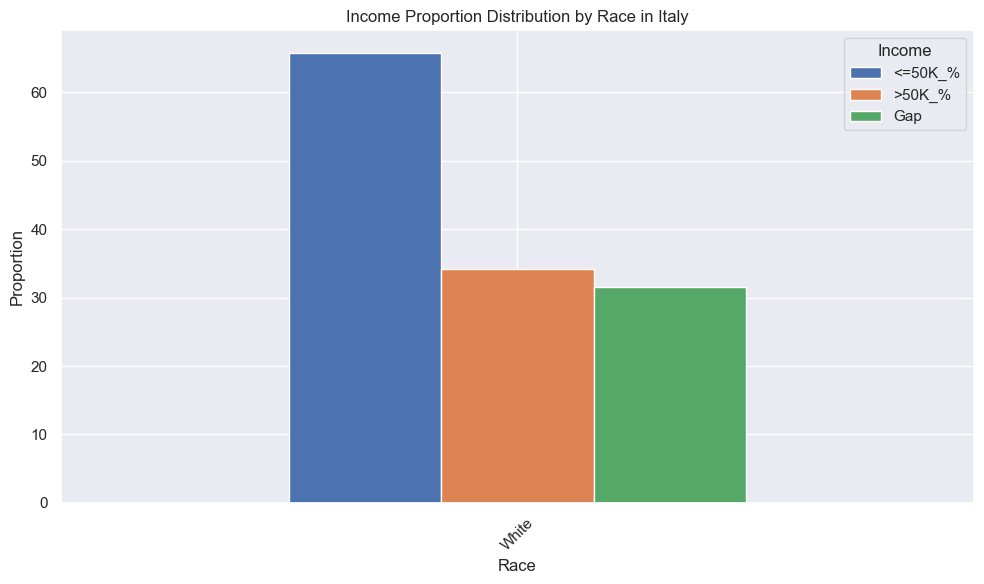

income    <=50K_%     >50K_%        Gap
race                                   
White   65.753425  34.246575  31.506849


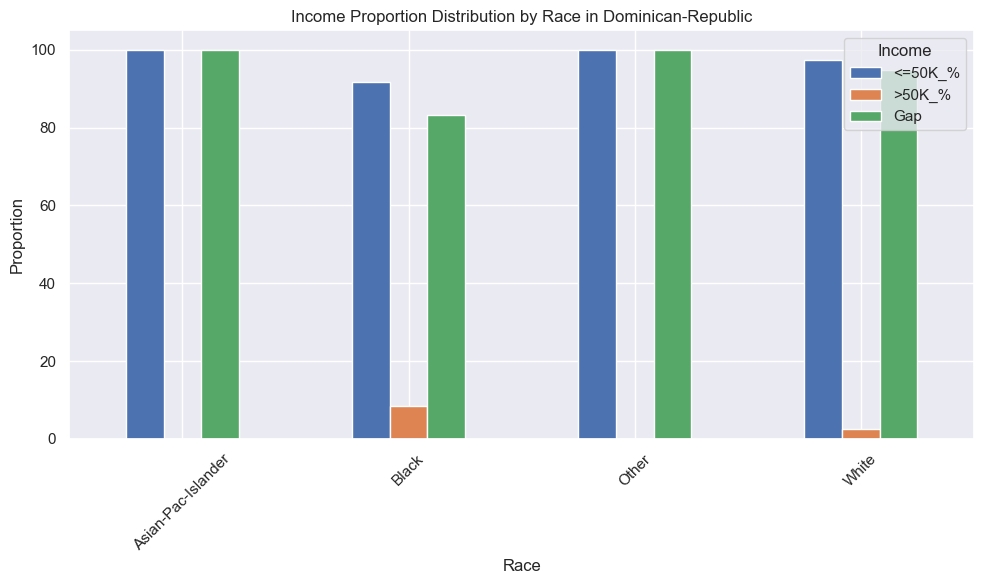

income                 <=50K_%    >50K_%         Gap
race                                                
Asian-Pac-Islander  100.000000  0.000000  100.000000
Black                91.666667  8.333333   83.333333
Other               100.000000  0.000000  100.000000
White                97.435897  2.564103   94.871795


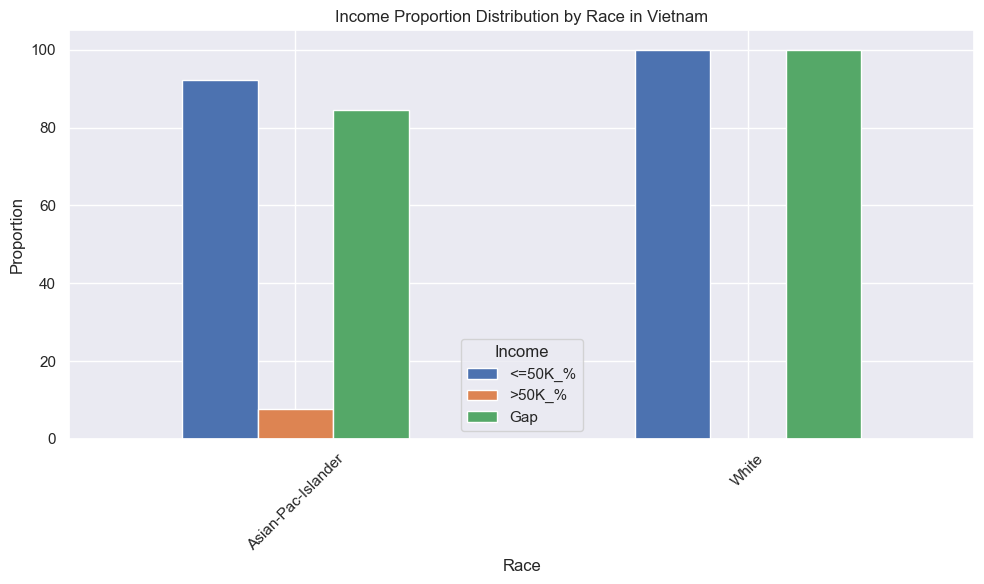

income                 <=50K_%    >50K_%         Gap
race                                                
Asian-Pac-Islander   92.307692  7.692308   84.615385
White               100.000000  0.000000  100.000000


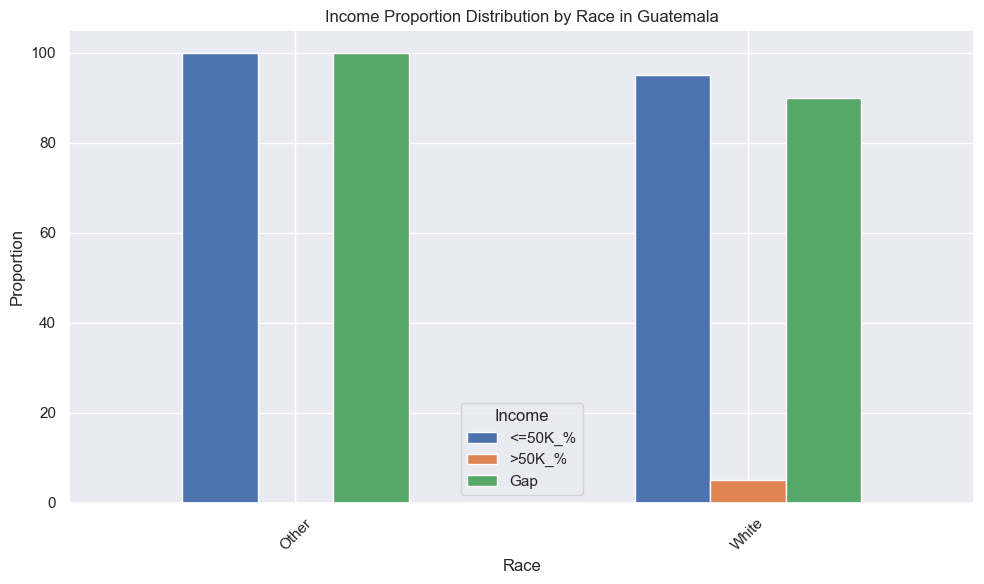

income  <=50K_%  >50K_%    Gap
race                          
Other     100.0     0.0  100.0
White      95.0     5.0   90.0


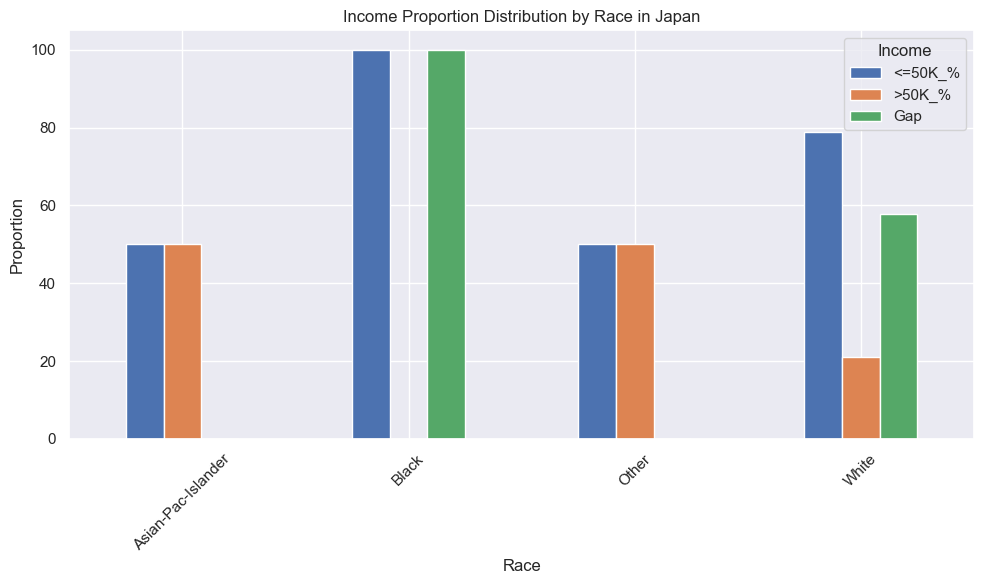

income                 <=50K_%     >50K_%         Gap
race                                                 
Asian-Pac-Islander   50.000000  50.000000    0.000000
Black               100.000000   0.000000  100.000000
Other                50.000000  50.000000    0.000000
White                78.947368  21.052632   57.894737


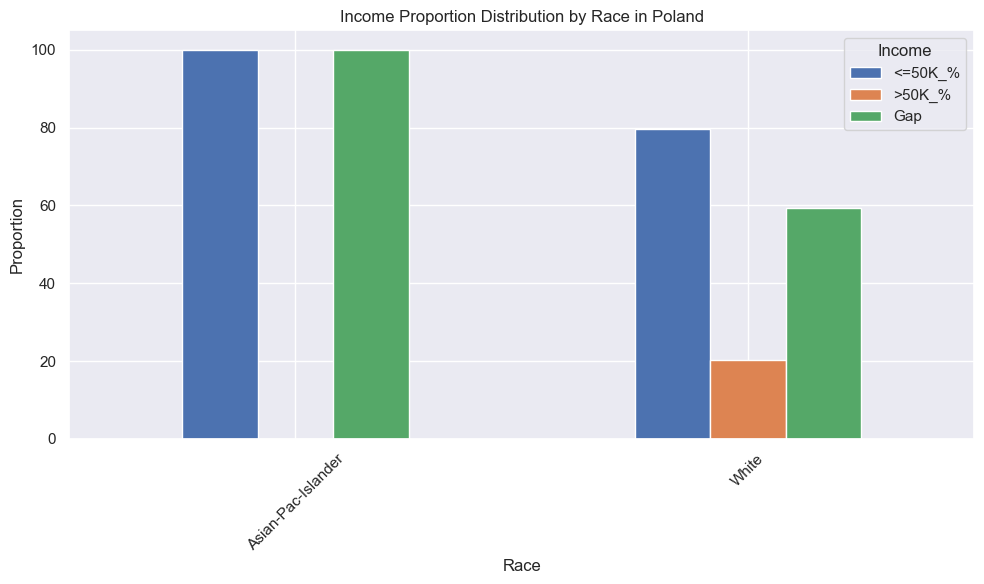

income                 <=50K_%     >50K_%         Gap
race                                                 
Asian-Pac-Islander  100.000000   0.000000  100.000000
White                79.661017  20.338983   59.322034


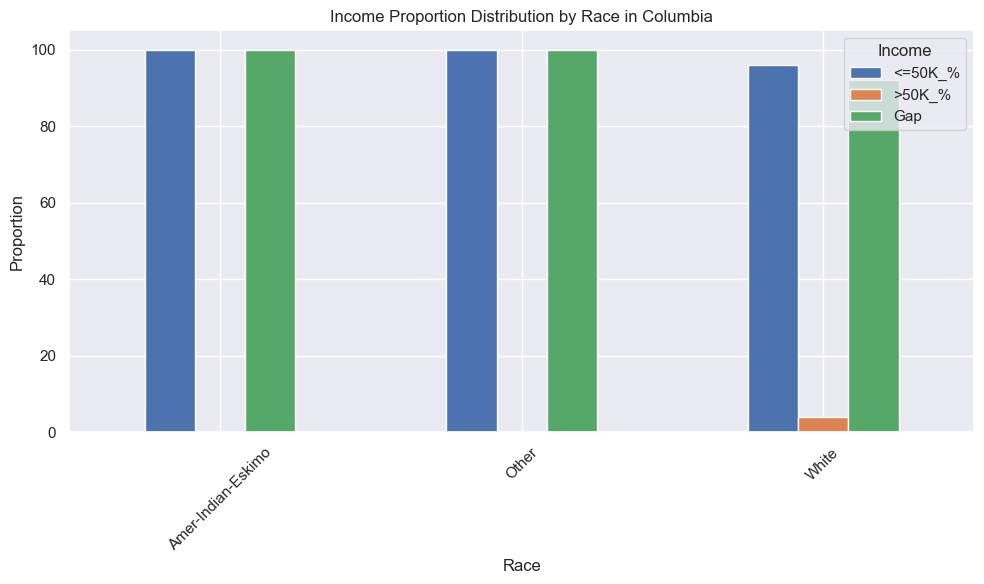

income                 <=50K_%    >50K_%         Gap
race                                                
Amer-Indian-Eskimo  100.000000  0.000000  100.000000
Other               100.000000  0.000000  100.000000
White                96.078431  3.921569   92.156863


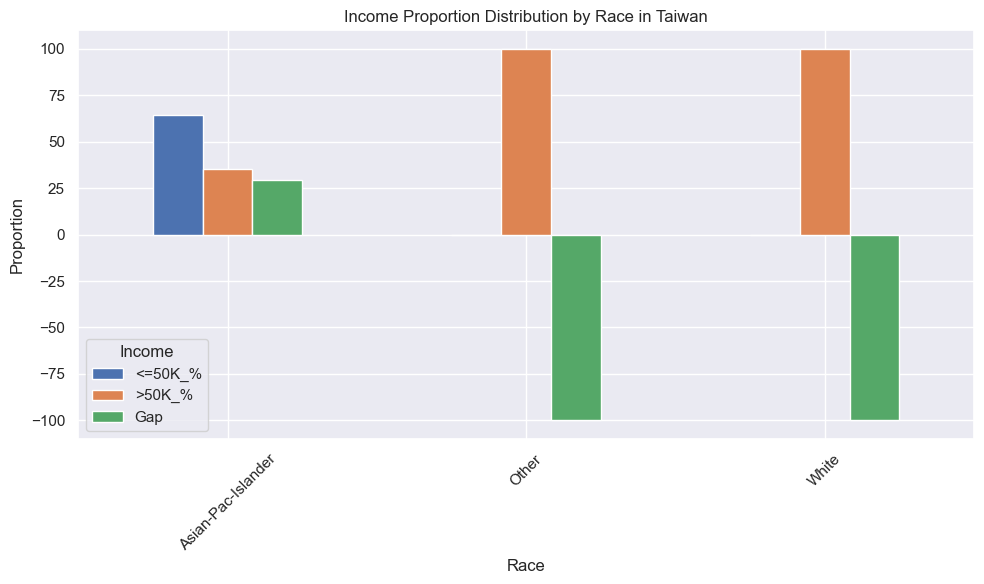

income                <=50K_%      >50K_%         Gap
race                                                 
Asian-Pac-Islander  64.583333   35.416667   29.166667
Other                0.000000  100.000000 -100.000000
White                0.000000  100.000000 -100.000000


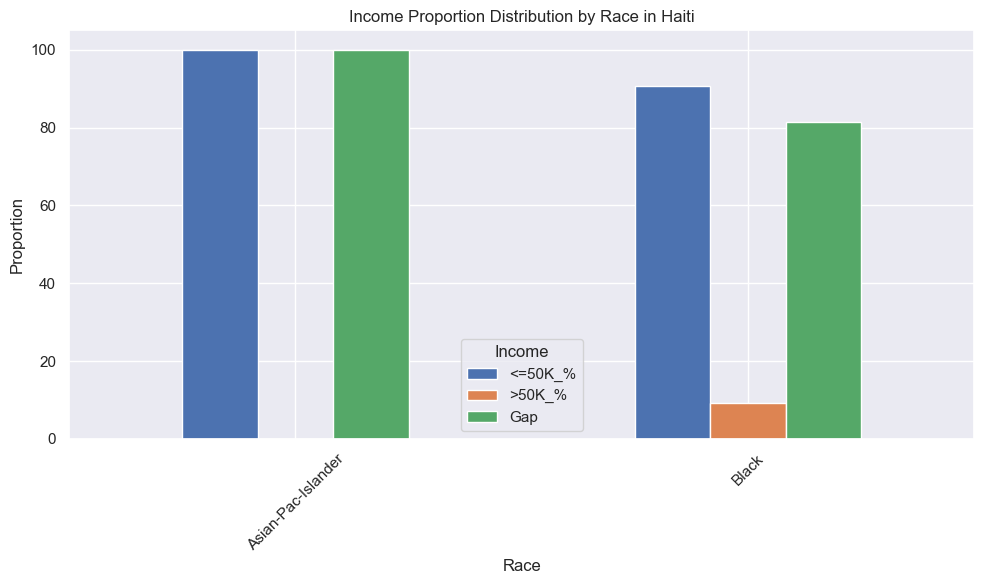

income                 <=50K_%    >50K_%         Gap
race                                                
Asian-Pac-Islander  100.000000  0.000000  100.000000
Black                90.697674  9.302326   81.395349


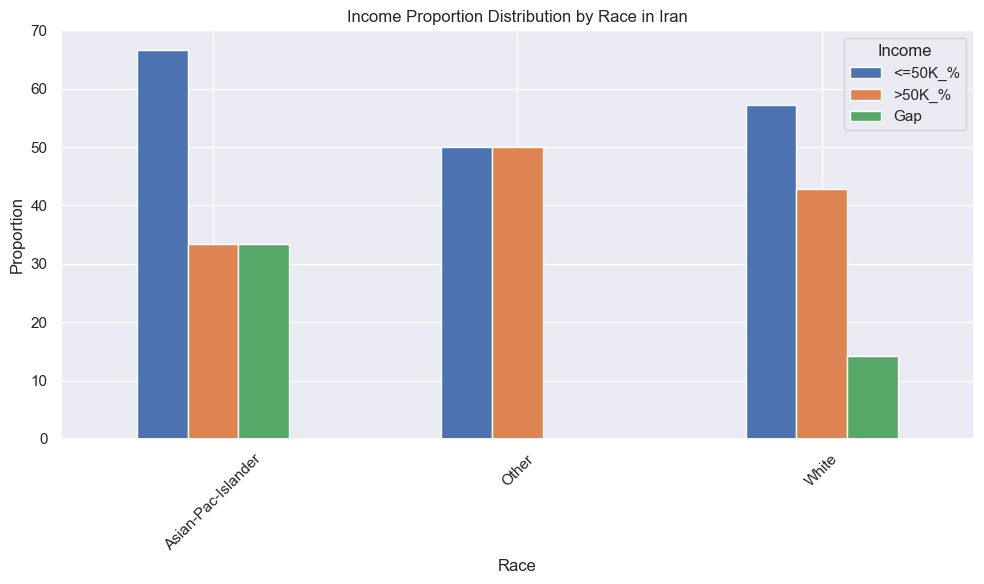

income                <=50K_%     >50K_%        Gap
race                                               
Asian-Pac-Islander  66.666667  33.333333  33.333333
Other               50.000000  50.000000   0.000000
White               57.142857  42.857143  14.285714


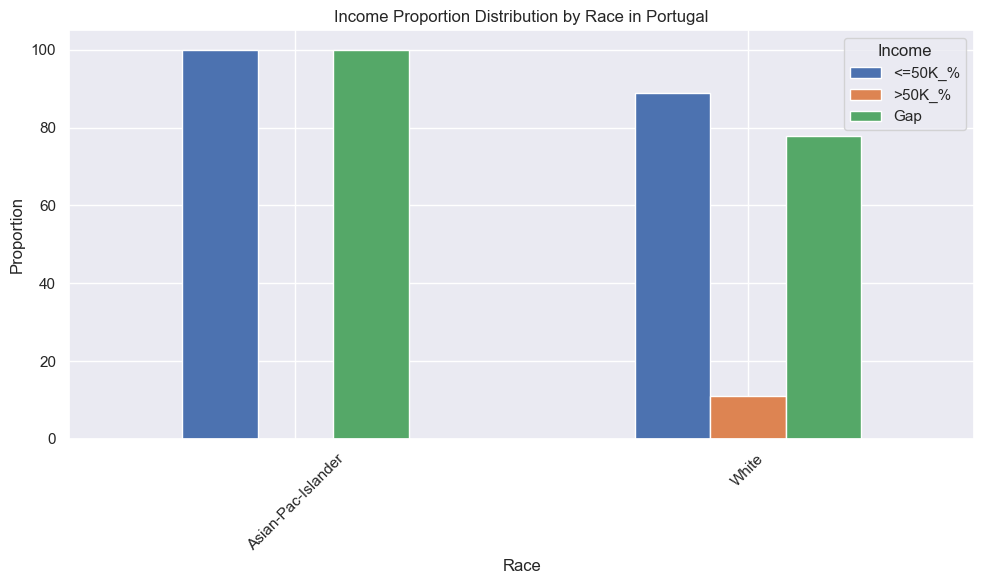

income                 <=50K_%     >50K_%         Gap
race                                                 
Asian-Pac-Islander  100.000000   0.000000  100.000000
White                88.888889  11.111111   77.777778


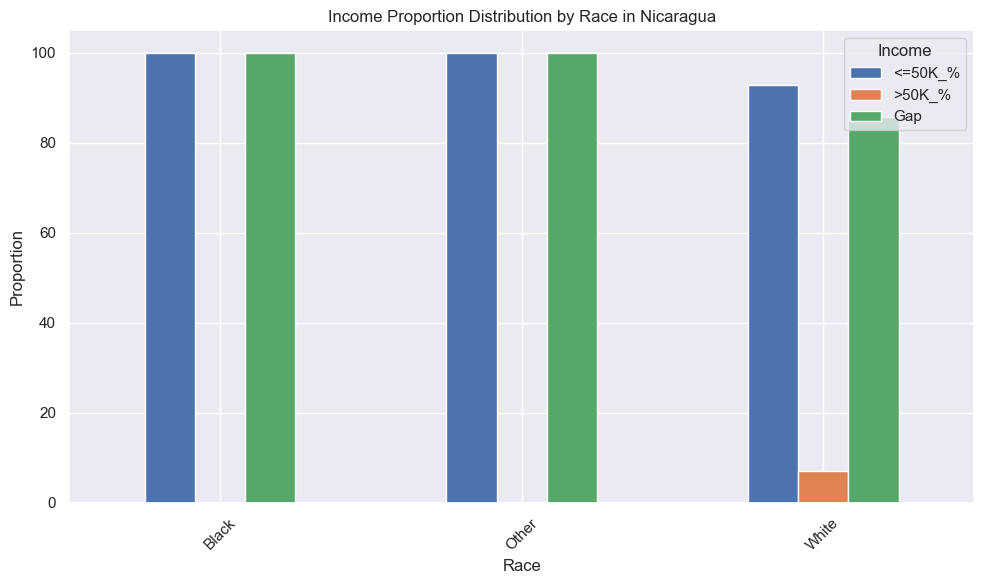

income     <=50K_%    >50K_%         Gap
race                                    
Black   100.000000  0.000000  100.000000
Other   100.000000  0.000000  100.000000
White    92.857143  7.142857   85.714286


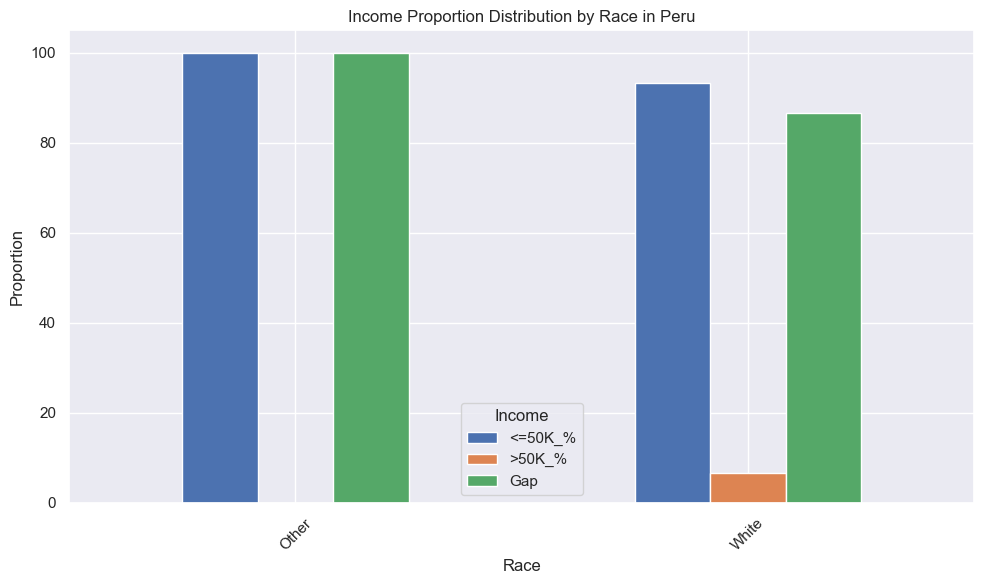

income     <=50K_%    >50K_%         Gap
race                                    
Other   100.000000  0.000000  100.000000
White    93.333333  6.666667   86.666667


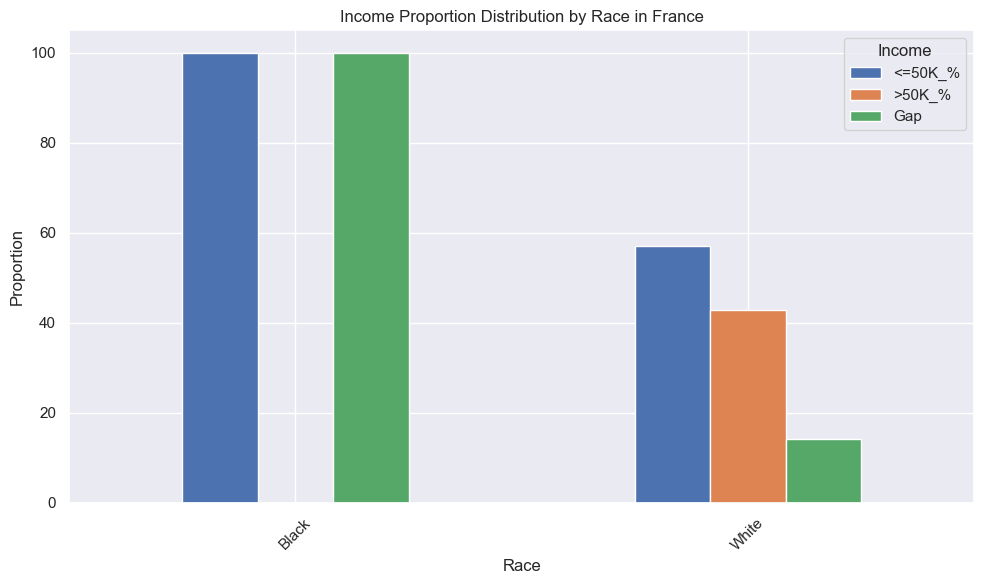

income     <=50K_%     >50K_%         Gap
race                                     
Black   100.000000   0.000000  100.000000
White    57.142857  42.857143   14.285714


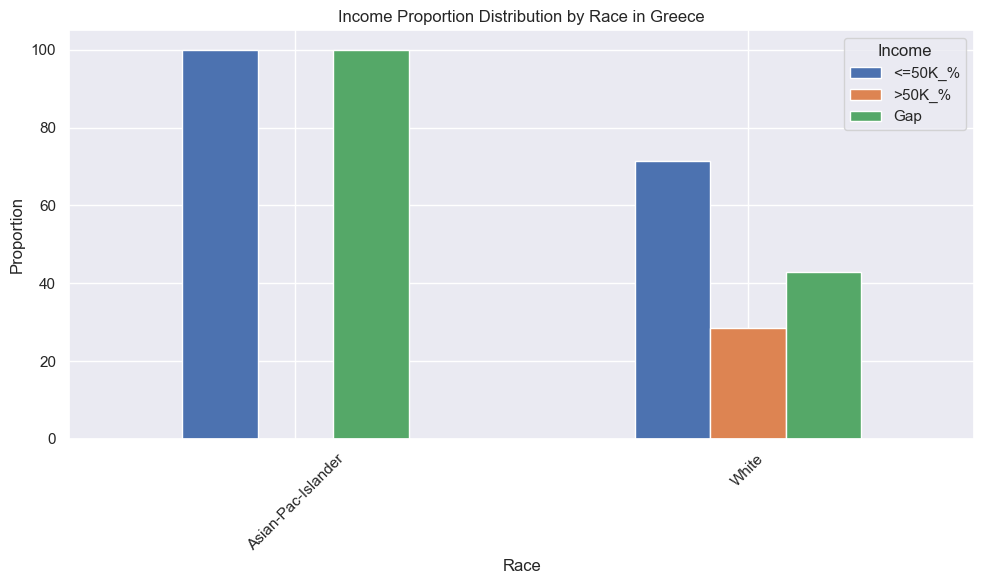

income                 <=50K_%     >50K_%         Gap
race                                                 
Asian-Pac-Islander  100.000000   0.000000  100.000000
White                71.428571  28.571429   42.857143


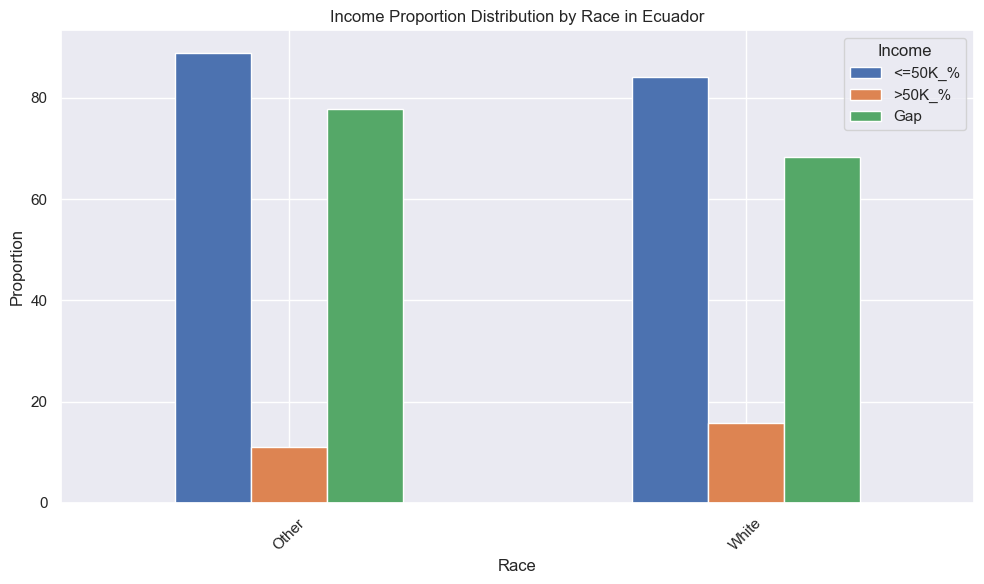

income    <=50K_%     >50K_%        Gap
race                                   
Other   88.888889  11.111111  77.777778
White   84.210526  15.789474  68.421053


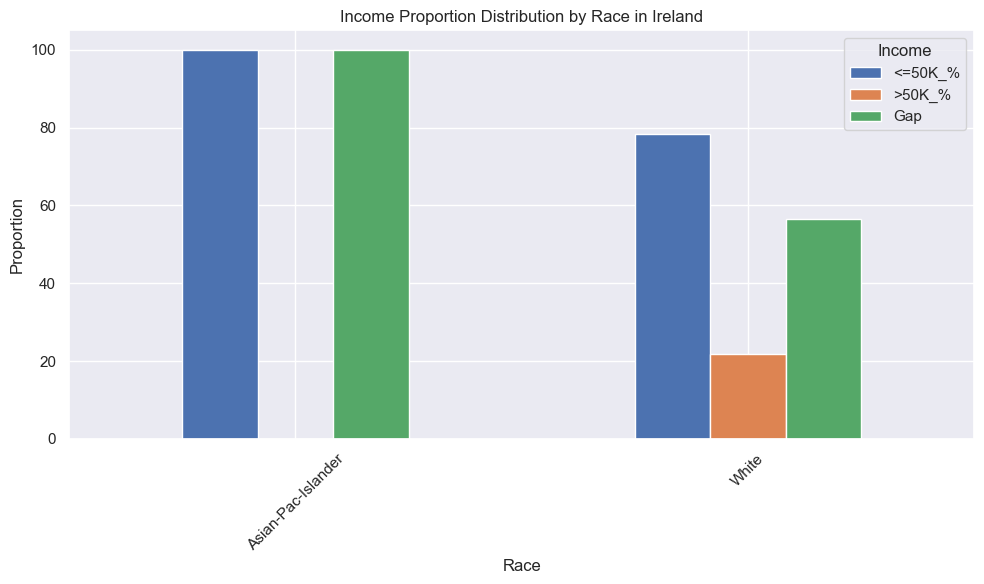

income                <=50K_%    >50K_%         Gap
race                                               
Asian-Pac-Islander  100.00000   0.00000  100.000000
White                78.26087  21.73913   56.521739


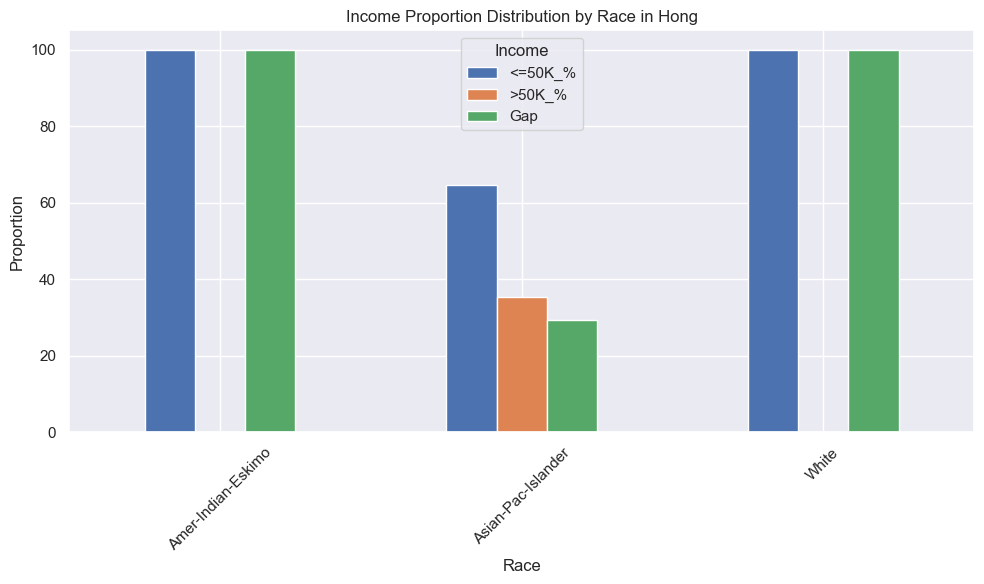

income                 <=50K_%     >50K_%         Gap
race                                                 
Amer-Indian-Eskimo  100.000000   0.000000  100.000000
Asian-Pac-Islander   64.705882  35.294118   29.411765
White               100.000000   0.000000  100.000000


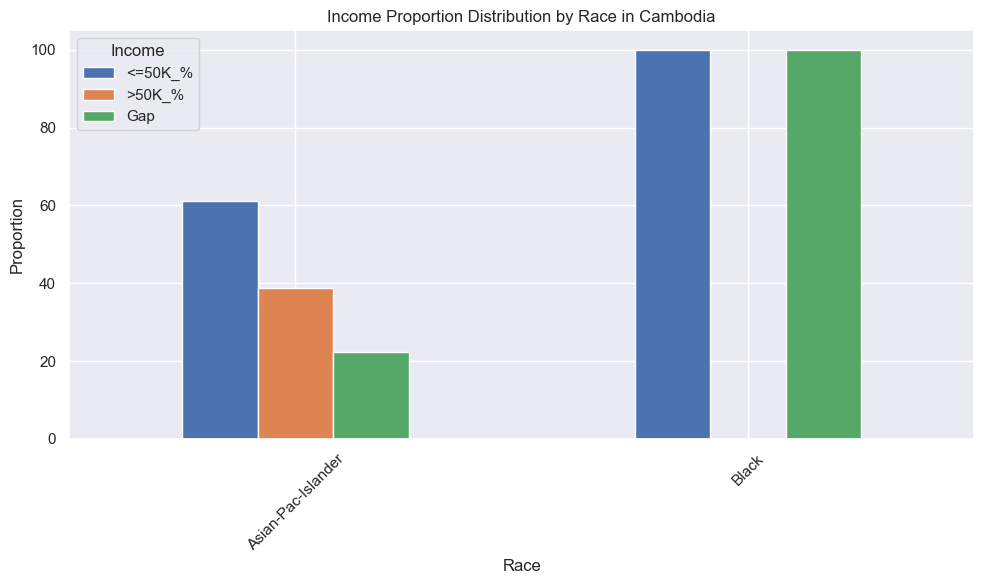

income                 <=50K_%     >50K_%         Gap
race                                                 
Asian-Pac-Islander   61.111111  38.888889   22.222222
Black               100.000000   0.000000  100.000000


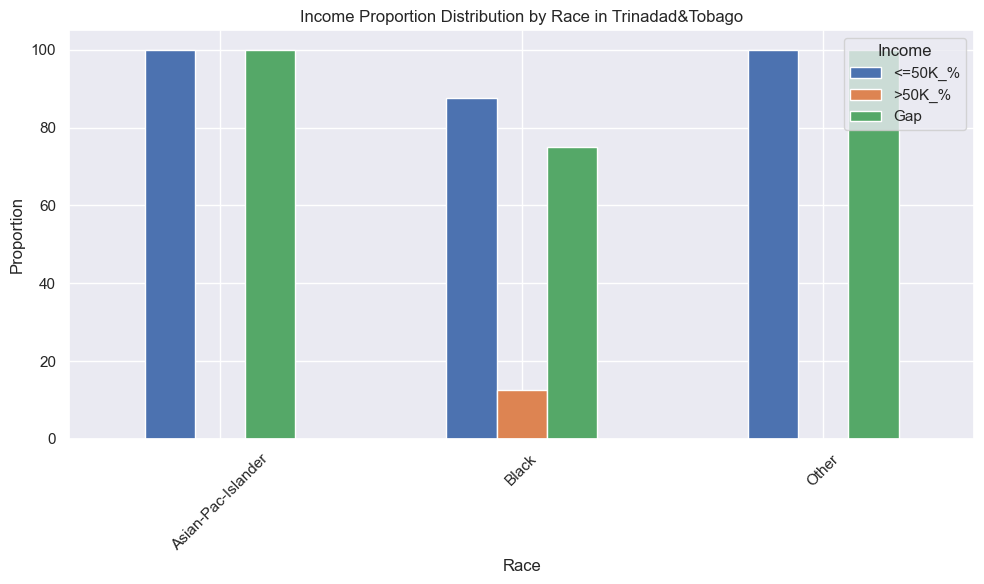

income              <=50K_%  >50K_%    Gap
race                                      
Asian-Pac-Islander    100.0     0.0  100.0
Black                  87.5    12.5   75.0
Other                 100.0     0.0  100.0


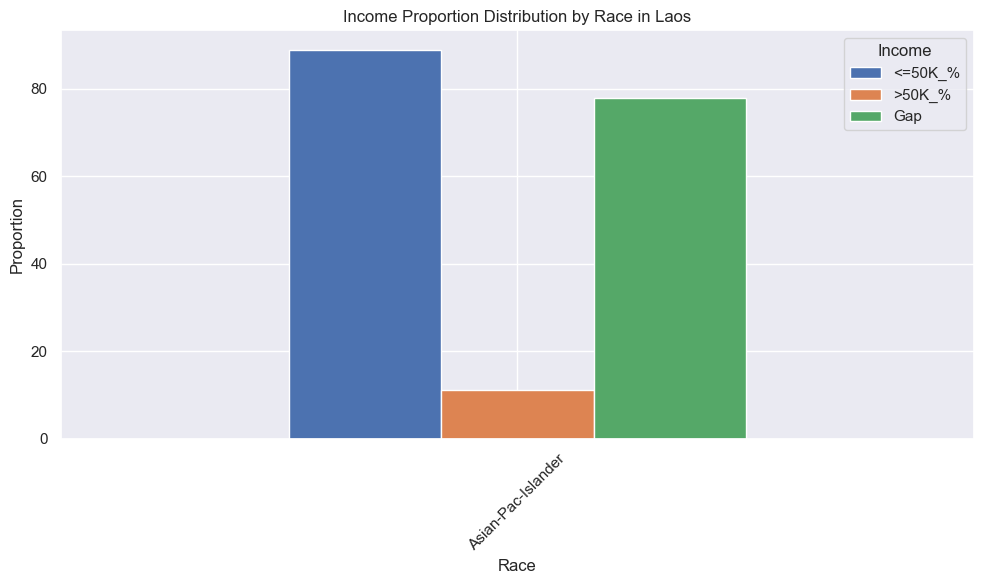

income                <=50K_%     >50K_%        Gap
race                                               
Asian-Pac-Islander  88.888889  11.111111  77.777778


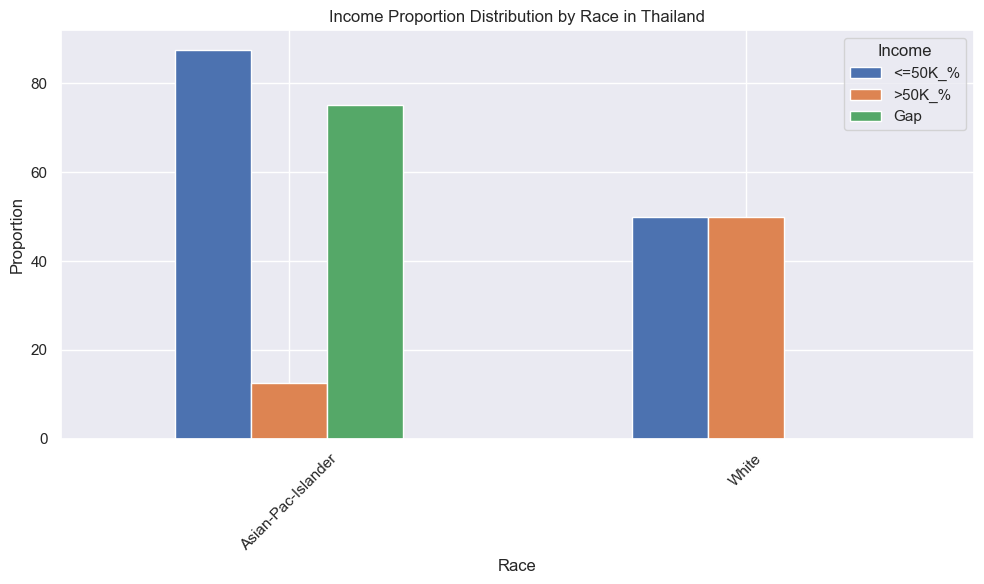

income              <=50K_%  >50K_%   Gap
race                                     
Asian-Pac-Islander     87.5    12.5  75.0
White                  50.0    50.0   0.0


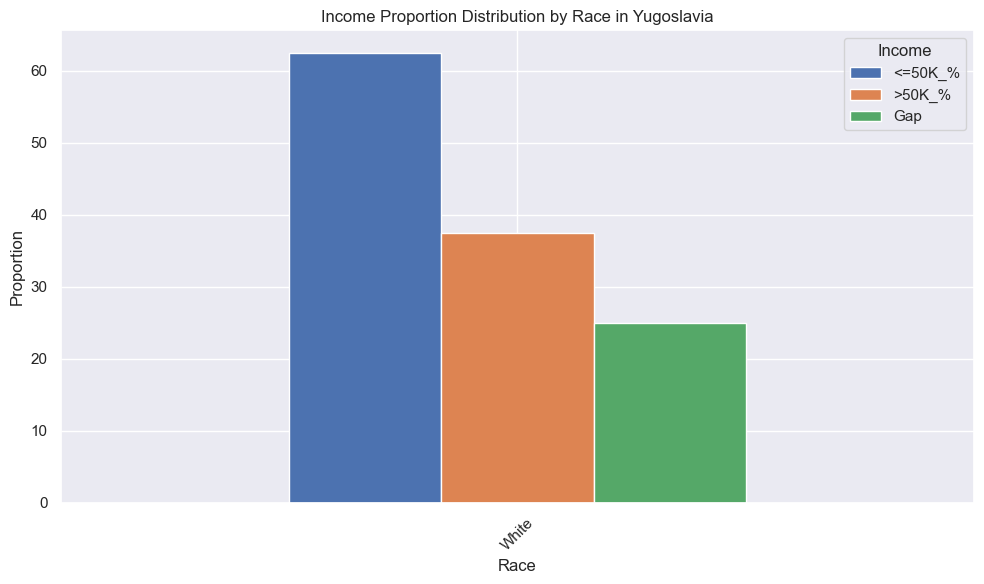

income  <=50K_%  >50K_%   Gap
race                         
White      62.5    37.5  25.0


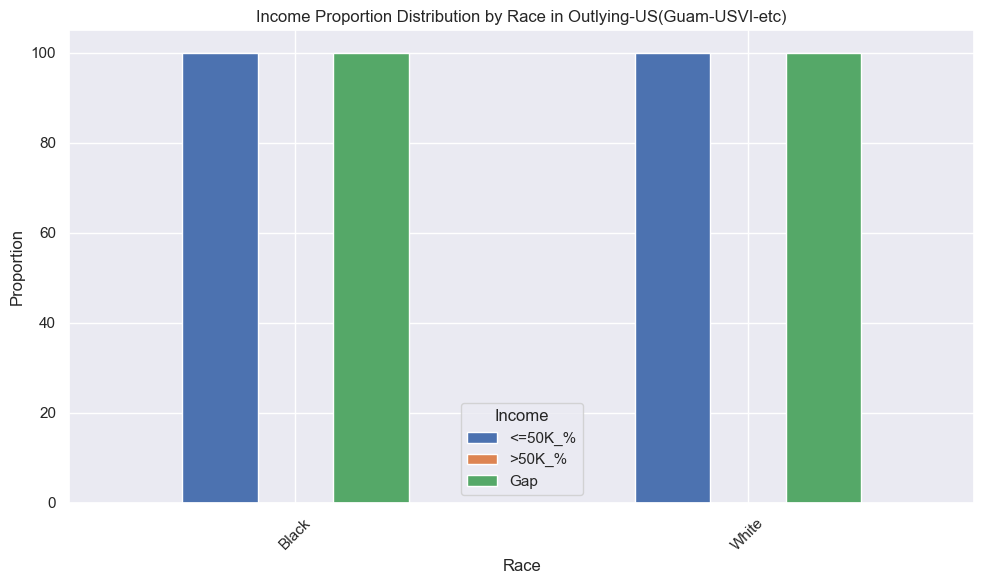

income  <=50K_%  >50K_%    Gap
race                          
Black     100.0     0.0  100.0
White     100.0     0.0  100.0


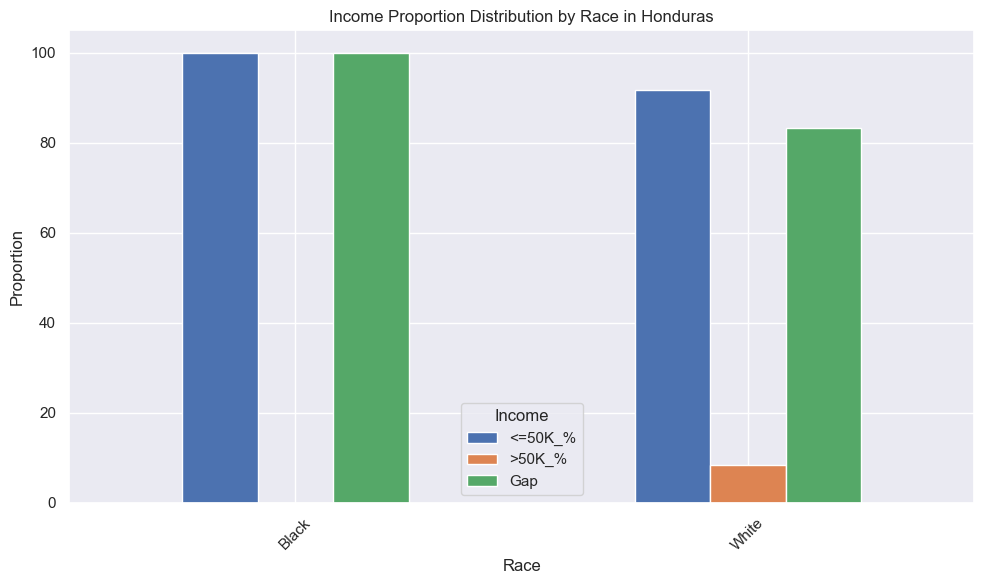

income     <=50K_%    >50K_%         Gap
race                                    
Black   100.000000  0.000000  100.000000
White    91.666667  8.333333   83.333333


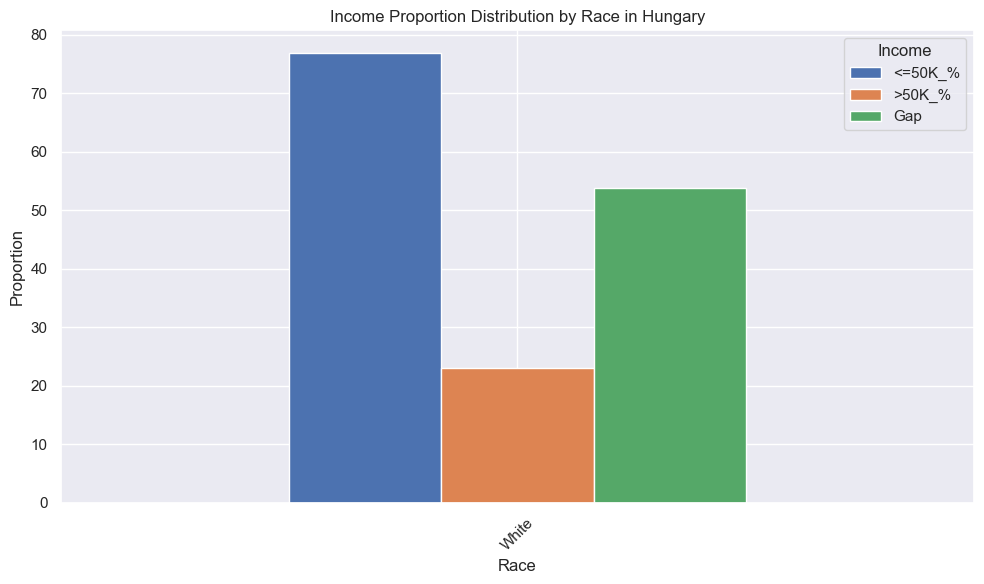

income    <=50K_%     >50K_%        Gap
race                                   
White   76.923077  23.076923  53.846154


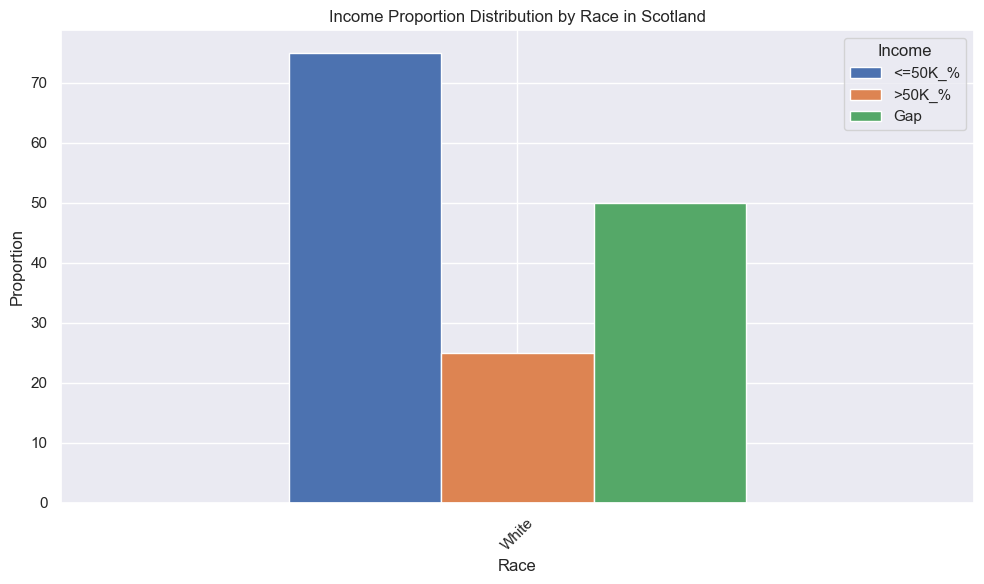

income  <=50K_%  >50K_%   Gap
race                         
White      75.0    25.0  50.0


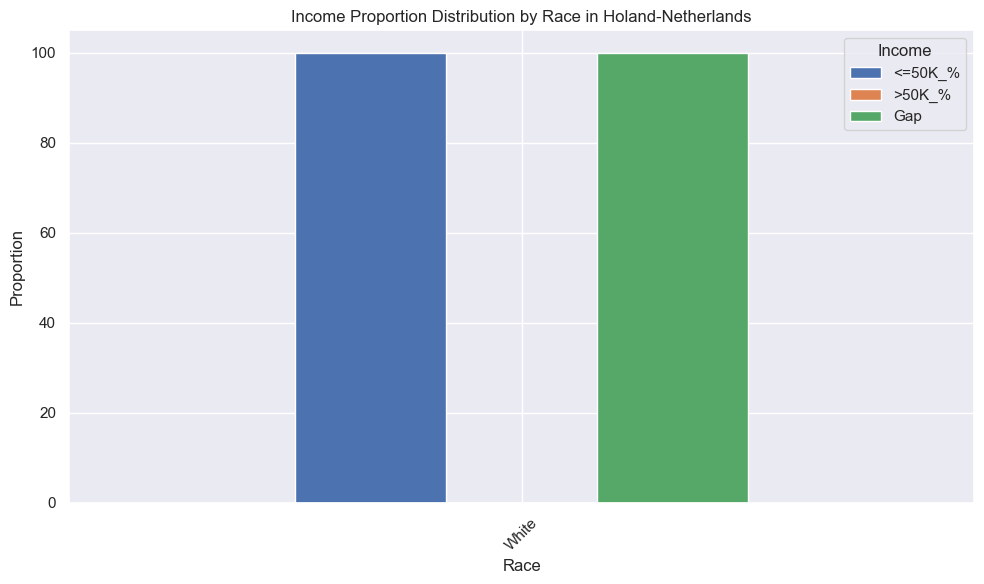

income  <=50K_%  >50K_%    Gap
race                          
White     100.0     0.0  100.0


In [266]:
# 依照各國勞動人扣排序的 data frame
unique_combinations = unique_combinations.sort_values(by='country_workforce', ascending=False)
native_country_list = list(unique_combinations['native_country'].unique())

# 設置 Seaborn 風格
sns.set()

for i in native_country_list:
    df = race_income_proportion_distribution_by_country(data, i)
    plot_race_income_proportion_distribution_by_country(df, i)
    

發現: 加拿大、台灣和菲律賓都出現">50k"的比例 大過 "<=50k" 的現象，台、菲是白人，加拿大則是亞裔

<a id="在各自國家中，種族收入最高的族群為何?"></a>
<br><br><br><br>
<br><br>
問題1: [各國勞動力人口數量分布?](#各國勞動力人口數量分布?)<br><br>  
(觀察)[不同國家之間，國內每個種族的收入水準](#不同國家之間，國內每個種族的收入水準)<br><br>
問題3: [哪個種族最容易出現貧富差距?](#哪個種族最容易出現貧富差距?)<br><br>

## 問題2: 在各自國家中，種族收入最高的族群為何?

<br>
作法: 觀察每個國家，哪個人種收入>50k比例最高? 做計數統計



<br><br>
[回到作業](#回到作業)

In [267]:
import pandas as pd  # 确保导入了 pandas

# 初始化一个空列表来收集数据
list_above_50K = []

for i in native_country_list:
    df = race_income_proportion_distribution_by_country(data, i)
    highest_income_race = df['>50K_%'].idxmax()  # 找出 '>50K_%' 最大值的索引
    # 将国家和最高收入种族添加到列表中
    list_above_50K.append([i, highest_income_race])

# 使用列表创建一个新的 DataFrame
output_df = pd.DataFrame(list_above_50K, columns=['native_country', 'highest_income_race'])

# 输出新的 DataFrame
# print(output_df)


發現: 大部分國家的白人群體收入最高

In [268]:
most_highest_income_race_around_the_world = output_df['highest_income_race'].value_counts()
most_highest_income_race_around_the_world

White                 26
Black                  7
Asian-Pac-Islander     6
Other                  2
Amer-Indian-Eskimo     1
Name: highest_income_race, dtype: int64

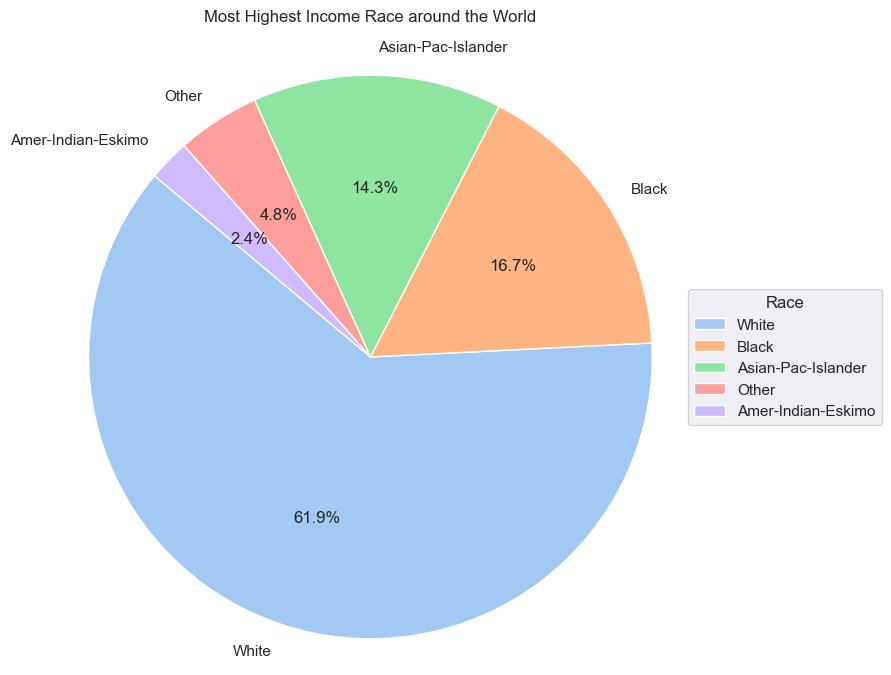

In [269]:
# 設置 Seaborn 風格
sns.set()

# 數據準備
labels = most_highest_income_race_around_the_world.index
sizes = most_highest_income_race_around_the_world.values
colors = sns.color_palette('pastel')[:len(labels)]  # 使用 Seaborn 的顏色

# 創建餅圖
plt.figure(figsize=(8, 8))  # 設置圖形的大小
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 確保餅圖是圓的
plt.legend(labels, title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Most Highest Income Race around the World', pad=20)
plt.show()


<a id="哪個種族最容易出現貧富差距?"></a>

<br><br><br><br>
<br><br>
問題1: [各國勞動力人口數量分布?](#各國勞動力人口數量分布?)<br><br>
問題2: [在各自國家中，種族收入最高的族群為何?](#在各自國家中，種族收入最高的族群為何?)   
<br>(觀察)[不同國家之間，國內每個種族的收入水準](#不同國家之間，國內每個種族的收入水準)<br><br>

## 問題3: 哪個種族最容易出現貧富差距?

<br>
作法: 觀察每一個國家哪個人種的 Gap (綠色柱子) 最高，做計數統計。

<br><br>
[回到作業](#回到作業)

In [272]:
import pandas as pd  # 确保导入了 pandas

# 初始化一个空列表来收集数据
list_Gap = []

for i in native_country_list:
    df = race_income_proportion_distribution_by_country(data, i)
    df['Gap'] = abs(df['Gap'])
    biggest_gap_race = df['Gap'].idxmax()  # 找出 'Gap' 最大值的索引
    # 将国家和最高收入种族添加到列表中
    list_Gap.append([i, biggest_gap_race])

# 使用列表创建一个新的 DataFrame
output_gap_df = pd.DataFrame(list_Gap, columns=['native_country', 'biggest_gap_race'])

# 输出新的 DataFrame
print(output_gap_df)

                native_country    biggest_gap_race
0                United-States               Other
1                       Mexico  Amer-Indian-Eskimo
2                            ?               Black
3                  Philippines  Amer-Indian-Eskimo
4                      Germany  Amer-Indian-Eskimo
5                       Canada  Asian-Pac-Islander
6                  Puerto-Rico  Amer-Indian-Eskimo
7                  El-Salvador               Black
8                        India               White
9                         Cuba               Other
10                     England  Asian-Pac-Islander
11                     Jamaica               Other
12                       South               White
13                       China  Asian-Pac-Islander
14                       Italy               White
15          Dominican-Republic  Asian-Pac-Islander
16                     Vietnam               White
17                   Guatemala               Other
18                       Japan 

In [275]:
most_race_with_biggest_income_gap_around_the_world = output_gap_df['biggest_gap_race'].value_counts()
most_race_with_biggest_income_gap_around_the_world

Asian-Pac-Islander    13
Black                  8
White                  8
Other                  7
Amer-Indian-Eskimo     6
Name: biggest_gap_race, dtype: int64

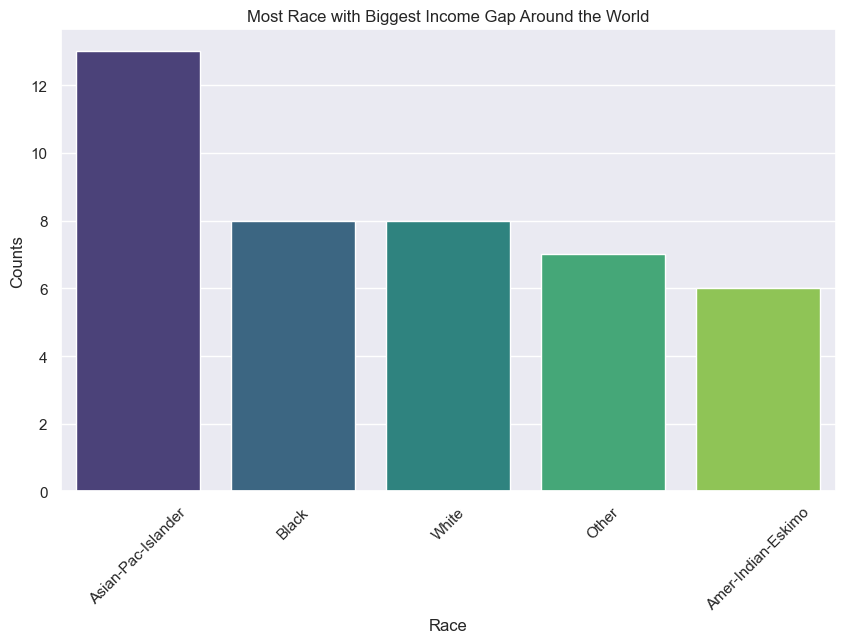

In [278]:
import seaborn as sns

# 使用 seaborn 绘制柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x='biggest_gap_race', y='counts', data=output_gap_df, palette='viridis')
plt.title('Most Race with Biggest Income Gap Around the World')
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()


發現: 縱觀世界各地，亞裔最容易出現貧富差距

<a id="結論"></a>
<br><br><br><br>
# 結論
- 發現 1: 美國人占了此資料將進九成的比例 >> imbalance data<br>
- 發現 2: 加拿大、台灣和菲律賓都出現">50k"的比例 大過 "<=50k" 的現象，台、菲是白人，加拿大則是亞裔<br>
- 發現 3: 大部分國家的白人群體收入最高<br>
- 發現 4: 縱觀世界各地，亞裔最容易出現貧富差距<br>

<br><br>
[回到作業](#回到作業)